In [1]:
# -------------------- Data Analysis -------------------- #
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# -------------------- Preprocessing -------------------- #
from imblearn.over_sampling import RandomOverSampler, SMOTENC, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from scipy import stats

# -------------------- Model selection -------------------- #
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

# -------------------- All the ML models used -------------------- #
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# -------------------- Model evaluation -------------------- #
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, fbeta_score, roc_curve, balanced_accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, RocCurveDisplay, plot_precision_recall_curve

# -------------------- For miscellaneous things -------------------- #
from sklearn import set_config
import eli5
from IPython.display import display, HTML
import warnings
import time
import joblib

warnings.filterwarnings('ignore')

def pretty_print(df):
    return display(HTML(df.to_html().replace("\\n","<br>")))

set_config(display='diagram')

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [21]:
df = pd.read_csv('Dataset_new.csv')
df
# df = Dataset

,customerID,Name,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Score.1,Churn Category
0,3668-QPYBK,Nabin Sapkota,Male,0,No,No,2,Yes,No,DSL,...,No,Yes,0.0,0,628.2,3872.7,1,Churned,86,Competitor
1,9237-HQITU,Deepika Danwar,Female,0,No,No,2,Yes,No,Fiber optic,...,No,Yes,0.0,0,547.2,5096.7,2,Churned,67,Other
2,9305-CDSKC,Swati Baral,Female,0,No,No,8,Yes,Yes,Fiber optic,...,No,Yes,0.0,0,2916.0,27531.0,3,Churned,86,Other
3,7892-POOKP,Kalpita Subba,Female,0,Yes,No,28,Yes,Yes,Fiber optic,...,Yes,Yes,0.0,0,4107.6,95489.1,3,Churned,84,Other
4,0280-XJGEX,Tulsi Duwadi,Male,0,No,No,49,Yes,Yes,Fiber optic,...,No,Yes,0.0,0,65165.1,216254.1,1,Churned,89,Competitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Diya Subba,Female,0,No,No,72,Yes,No,No,...,No,No,579.3,0,49183.2,91185.9,5,Stayed,45,0
7039,6840-RESVB,Priyam Siwakoti,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,1446.9,0,25956.0,84224.1,3,Stayed,59,0
7040,2234-XADUH,Bidisha Mahaseth,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,No,Yes,1361.4,0,64065.6,283591.2,4,Stayed,71,0
7041,4801-JZAZL,Mamta Kc,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,Yes,817.2,0,0.0,9576.3,4,Stayed,59,0


In [22]:
df.columns

Index(['customerID', 'Name', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'churn_rate', 'Churn Score', 'CLTV', 'Churn Reason', 'Count',
       'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Age', 'Under 30', 'Married', 'Referred a Friend',
       'Number of Referrals', 'Offer', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Streaming Music', 'Premium Tech Support',
       'Unlimited Data', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score',
       'Customer Status', 'Churn Score.1', 'Churn Category'],
      dtype='object')

# 1. Data Cleaning

### Dropping all the columns which are useless in modelling

In [2]:
cols_to_drop = ['customerID', 'Name', 'churn_rate', 'Churn Score', 'Churn Reason', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 
    'Latitude', 'Longitude', 'Customer Status', 'Churn Score.1', 'Churn Category', 'CLTV',
    'Satisfaction Score', 'Offer'
]
df.drop(cols_to_drop, axis = 1, inplace=True)
df

NameError: name 'df' is not defined

In [3]:
df.info()

NameError: name 'df' is not defined

### Move the target variable to the end

In [25]:
df = df[[col for col in list(df.columns) if col not in ['Churn']] + ['Churn']]

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn
0,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,314.1,21,No,No,Yes,0.0,0,628.2,3872.7,Yes
1,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,273.6,51,No,No,Yes,0.0,0,547.2,5096.7,Yes
2,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,364.5,26,Yes,No,Yes,0.0,0,2916.0,27531.0,Yes
3,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,146.7,47,Yes,Yes,Yes,0.0,0,4107.6,95489.1,Yes
4,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,...,1329.9,11,Yes,No,Yes,0.0,0,65165.1,216254.1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,...,683.1,0,No,No,No,579.3,0,49183.2,91185.9,No
7039,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,1081.5,24,Yes,Yes,Yes,1446.9,0,25956.0,84224.1,No
7040,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,889.8,59,Yes,No,Yes,1361.4,0,64065.6,283591.2,No
7041,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,0.0,17,No,No,Yes,817.2,0,0.0,9576.3,No


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.00,0.00,0.000,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.00,29.00,55.000,72.0
MonthlyCharges,7043.0,1942.850774,902.701413,547.5,1065.00,2110.50,2695.500,3562.5
TotalCharges,7032.0,68499.013225,68003.140856,564.0,12043.50,41924.25,113842.125,260544.0
Age,7043.0,46.509726,16.750352,19.0,32.00,46.00,60.000,80.0
Number of Referrals,7043.0,1.951867,3.001199,0.0,0.00,0.00,3.000,11.0
Avg Monthly Long Distance Charges,7043.0,688.768607,463.443400,0.0,276.30,686.70,1091.850,1499.7
Avg Monthly GB Download,7043.0,20.515405,20.418940,0.0,3.00,17.00,27.000,85.0
Total Refunds,7043.0,58.865469,237.078432,0.0,0.00,0.00,0.000,1493.7
Total Extra Data Charges,7043.0,205.821383,753.149340,0.0,0.00,0.00,0.000,4500.0


#### Convert SeniorCitizen to object.

In [28]:
df['SeniorCitizen'].replace({0 : 'No', 1 : 'Yes'}, inplace = True)

#### Tenure cannot be zero.

In [29]:
df['tenure'].replace({0 : np.nan}, inplace = True)

In [30]:
df.isnull().sum()

gender                                0
SeniorCitizen                         0
Partner                               0
Dependents                            0
tenure                               11
PhoneService                          0
MultipleLines                         0
InternetService                       0
OnlineSecurity                        0
OnlineBackup                          0
DeviceProtection                      0
TechSupport                           0
StreamingTV                           0
StreamingMovies                       0
Contract                              0
PaperlessBilling                      0
PaymentMethod                         0
MonthlyCharges                        0
TotalCharges                         11
Age                                   0
Under 30                              0
Married                               0
Referred a Friend                     0
Number of Referrals                   0
Avg Monthly Long Distance Charges     0


#### There are only 11 missing values out of 7043, so these rows can be dropped.

In [31]:
df.dropna(inplace = True)

In [107]:
df.isnull().sum()

gender                               0
SeniorCitizen                        0
Partner                              0
Dependents                           0
tenure                               0
PhoneService                         0
MultipleLines                        0
InternetService                      0
OnlineSecurity                       0
OnlineBackup                         0
DeviceProtection                     0
TechSupport                          0
StreamingTV                          0
StreamingMovies                      0
Contract                             0
PaperlessBilling                     0
PaymentMethod                        0
MonthlyCharges                       0
TotalCharges                         0
Age                                  0
Under 30                             0
Married                              0
Referred a Friend                    0
Number of Referrals                  0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download  

In [32]:
df['Churn'].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

#### Dealing with categorical features

In [33]:
cat = df.select_dtypes(include = 'object')      # Select all the categorical columns

for column in cat.columns:
    message = f'{column} : {cat[column].unique()}'
    print(message)

gender : ['Male' 'Female']
SeniorCitizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
PhoneService : ['Yes' 'No']
MultipleLines : ['No' 'Yes' 'No phone service']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['Yes' 'No' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year' 'One year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['eSewa' 'Cash' 'Mobile Banking' 'Credit card (automatic)']
Under 30 : ['No' 'Yes']
Married : ['No' 'Yes']
Referred a Friend : ['No' 'Yes']
Streaming Music : ['No' 'Yes']
Premium Tech Support : ['No' 'Yes']
Unlimited Data : ['Yes' 'No']
Churn : ['Yes' 'No']


#### 'No internet service' and 'No phone service' are the same as 'no', so replace them.

In [34]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [111]:
cat = df.select_dtypes(include = 'object')      # Select all the categorical columns

for column in cat.columns:
    message = f'{column} : {cat[column].unique()}'
    print(message)

gender : ['Male' 'Female']
SeniorCitizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
PhoneService : ['Yes' 'No']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['Yes' 'No']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'Two year' 'One year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['eSewa' 'Cash' 'Mobile Banking' 'Credit card (automatic)']
Under 30 : ['No' 'Yes']
Married : ['No' 'Yes']
Referred a Friend : ['No' 'Yes']
Streaming Music : ['No' 'Yes']
Premium Tech Support : ['No' 'Yes']
Unlimited Data : ['Yes' 'No']
Churn : ['Yes' 'No']


# 2. Data Visualisation

In [35]:
palette_values = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2',
 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired',
 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd',
 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr',
 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r',
 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag',
 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r',
 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r',
 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket',
 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c',
 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r',
 'vlag', 'vlag_r', 'winter', 'winter_r']

#### Categorise numerical and categorical variables

In [36]:
features = df.drop('Churn', axis=1)
target = df['Churn']
num_features = features.select_dtypes(exclude='object').columns.tolist()
cat_features = features.select_dtypes(include='object').columns.tolist()

### Checking for outliers in continuous variables

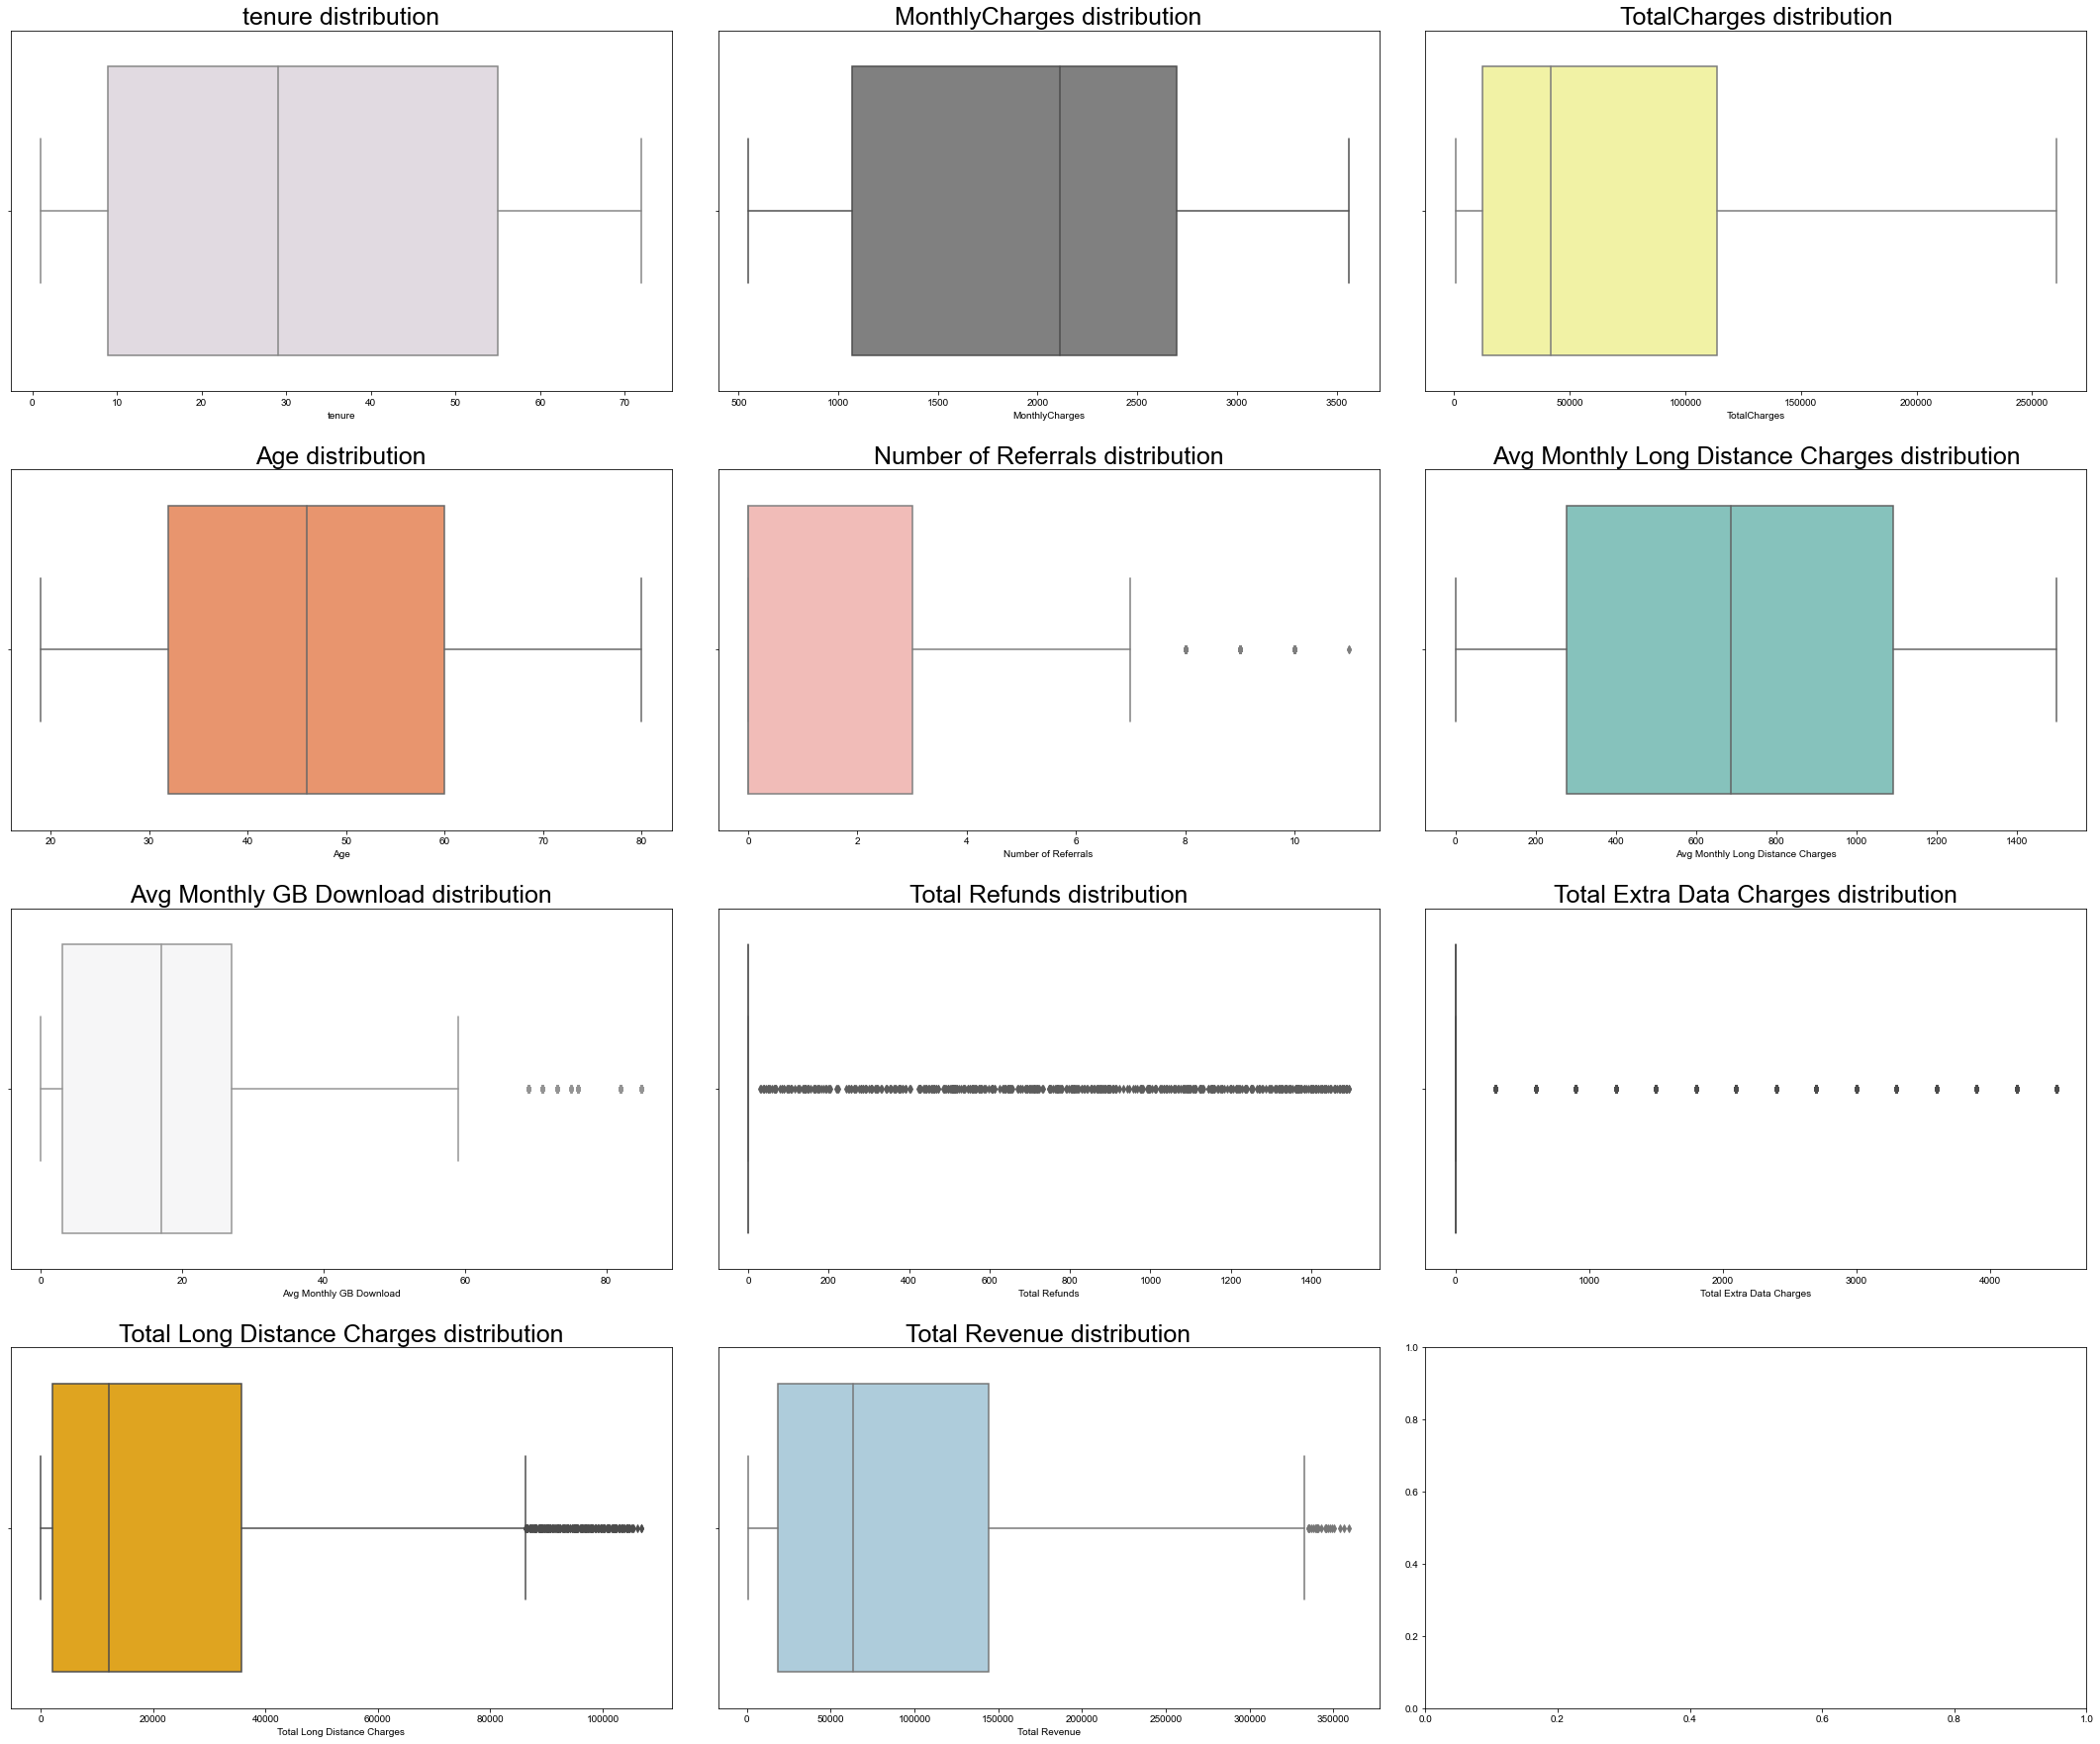

In [37]:
fig, axs = plt.subplots(4, 3, figsize=(30, 25))
for count, column in enumerate(num_features, start=1):
    sns.set(font_scale = 2)
    plt.subplot(4, 3, count)
    plt.title(column + " distribution", fontsize=25)
    # sns.histplot(df, x = column)
    sns.boxplot(data=df, x=column, palette=np.random.choice(palette_values))
    plt.tight_layout()
# plt.suptitle('Continuous Variable distribution')
# plt.savefig(f'Figures/SVG/Continuous_variables.svg')
plt.show()

Inferences:

1. Total Refunds have a majority value of zero.
2. Plently of outliers in Total Long Distance Charges

### Distribution of categorical variables

In [38]:
len(cat_features)

22

In [39]:
cat_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Under 30',
 'Married',
 'Referred a Friend',
 'Streaming Music',
 'Premium Tech Support',
 'Unlimited Data']

In [40]:
first_part = cat_features[0:6]
second_part = cat_features[6:12]
third_part = cat_features[12:18]
fourth_part = cat_features[18:]

In [41]:
cat_features[:6]

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines']

In [42]:
cat_features[6:12]

['InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV']

In [43]:
cat_features[12:18]

['StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Under 30',
 'Married']

In [44]:
cat_features[18:]

['Referred a Friend',
 'Streaming Music',
 'Premium Tech Support',
 'Unlimited Data']

In [47]:
import random
def pie_charts(part, file_name, row=2, col=3):
    fig, axs = plt.subplots(row, col, figsize=(25, 10))
    for index, column in enumerate(part, start=1):
        start_angle = np.random.randint(0, 360)
        color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(df[column].nunique())]
        plt.subplot(2, 3, index)
        plt.pie(df[column].value_counts(), shadow=True,startangle=start_angle,
                labels=df[column].value_counts().index, autopct='%0.2f%%',
                # explode=(0,0.08), 
                colors = color,
                textprops={'fontsize' : 15})
        plt.title(column, fontsize=20)
   # plt.savefig(f'Figures/PNG/Categorical_{file_name}.png')
   # plt.savefig(f'Figures/SVG/Categorical_{file_name}.svg')
    plt.show()

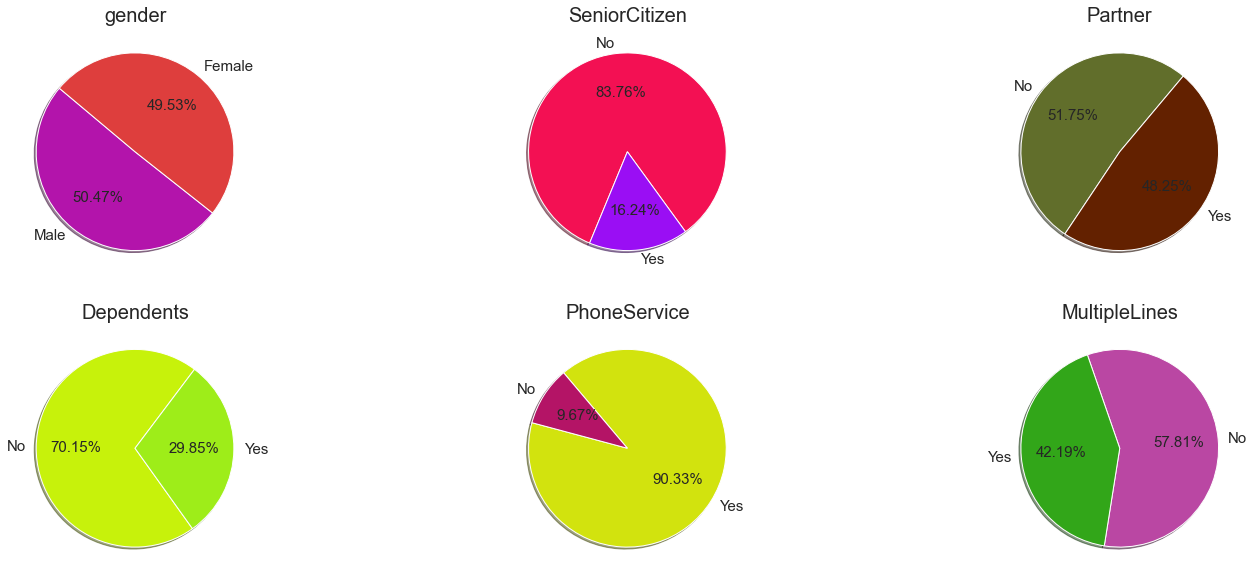

In [48]:
pie_charts(first_part, 'first_part')

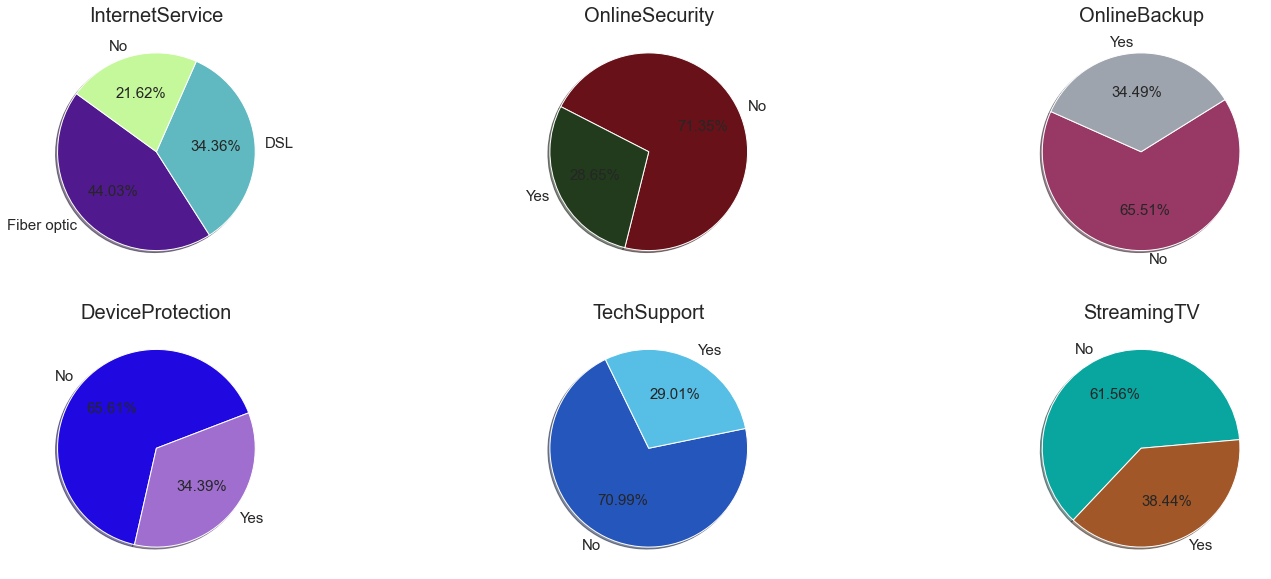

In [51]:
pie_charts(second_part, 'second_part')

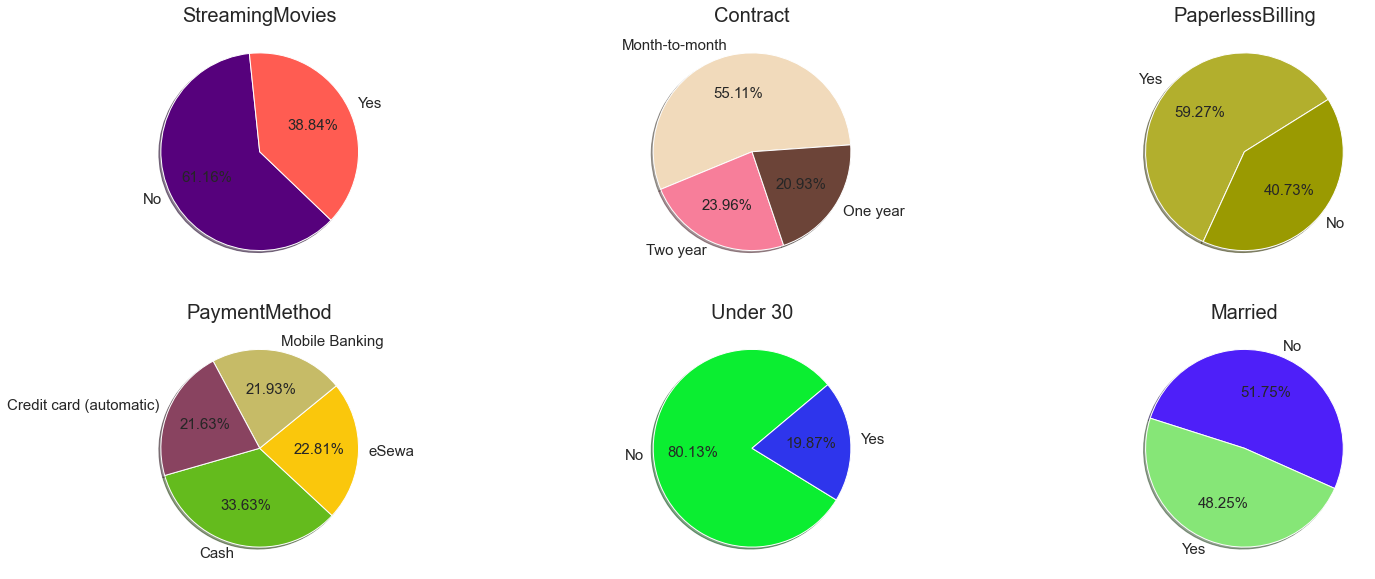

In [126]:
pie_charts(third_part, 'third_part')

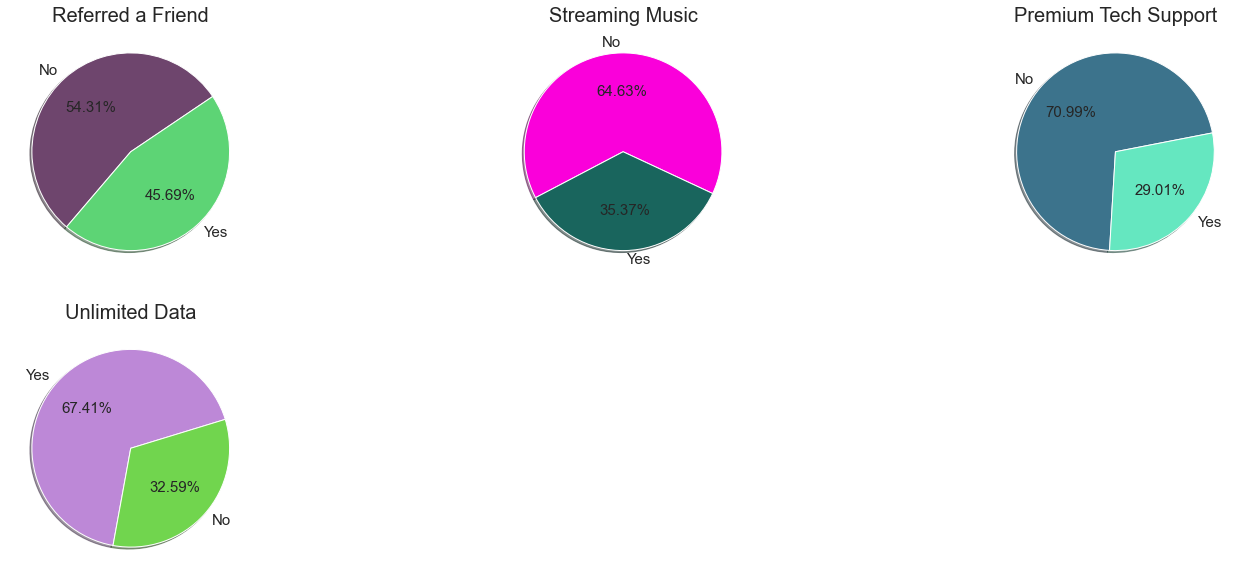

In [127]:
pie_charts(fourth_part, 'fourth_part', row=1, col=2)

### Bivariate analysis - VS Churn

In [128]:
palette_values = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2',
 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired',
 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd',
 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr',
 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r',
 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag',
 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r',
 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r',
 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket',
 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c',
 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r',
 'vlag', 'vlag_r', 'winter', 'winter_r']

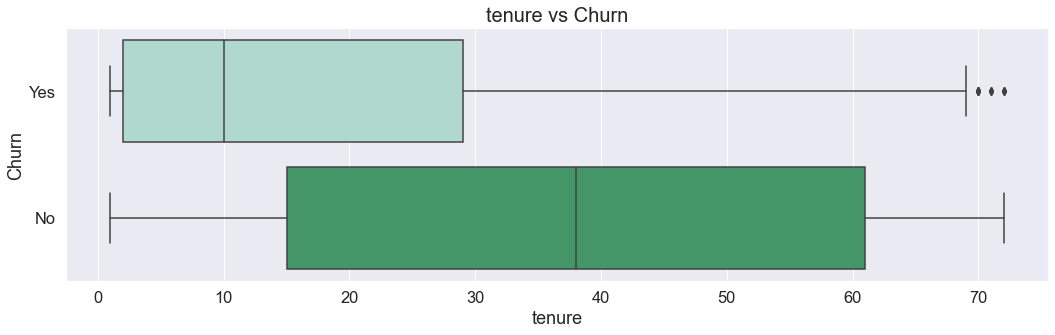

In [129]:
def boxplot_vs_churn(feature):
    plt.figure(figsize = (15, 5))
    sns.set(font_scale = 1.5)
    sns.boxplot(data=df, y='Churn', x =feature, orient = 'h', palette=np.random.choice(palette_values))
    plt.title(f'{feature} vs Churn', fontsize=20)
    plt.savefig(f'Figures/PNG/{feature}_vs_Churn.png')
    plt.savefig(f'Figures/SVG/{feature}_vs_Churn.svg')
    plt.tight_layout()
    plt.show()
boxplot_vs_churn('tenure')

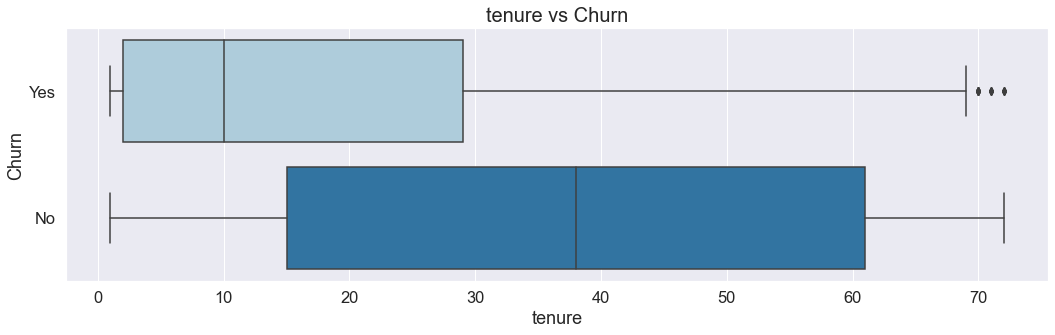

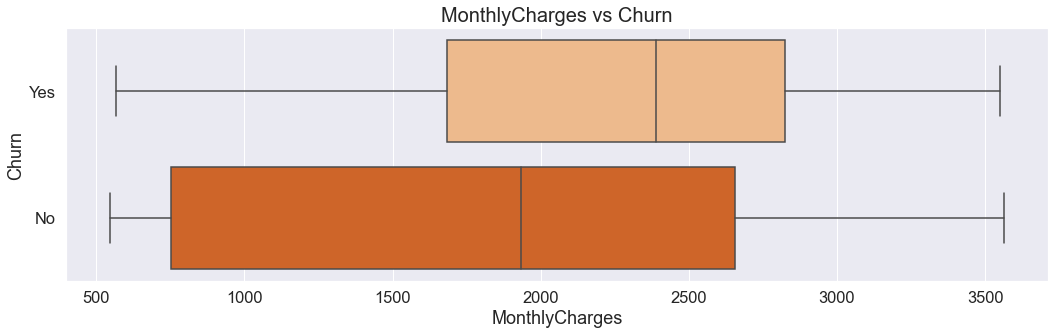

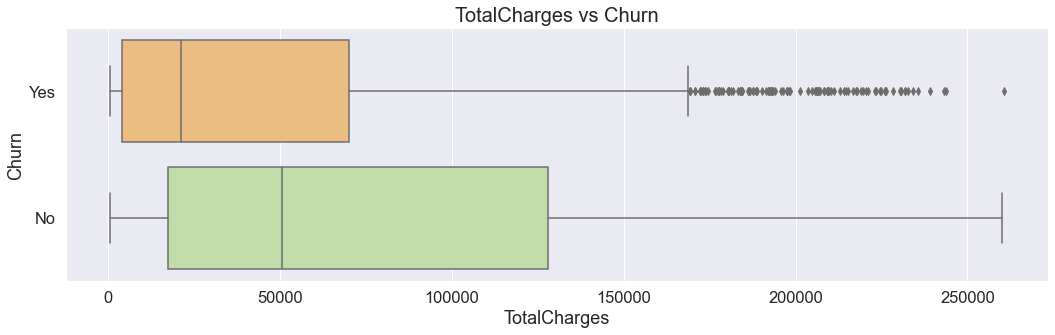

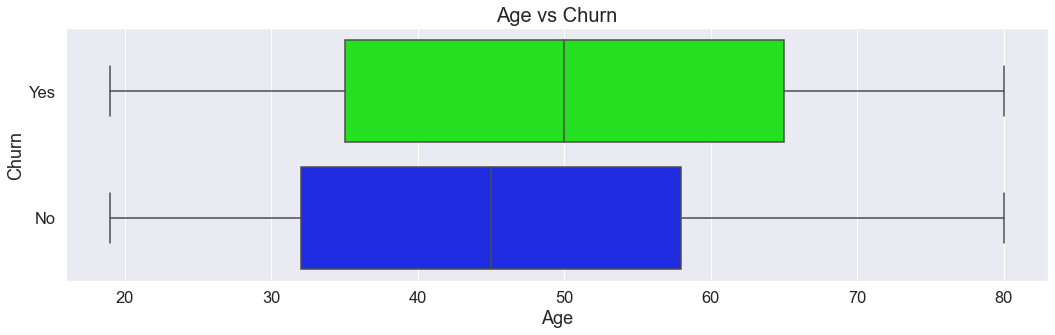

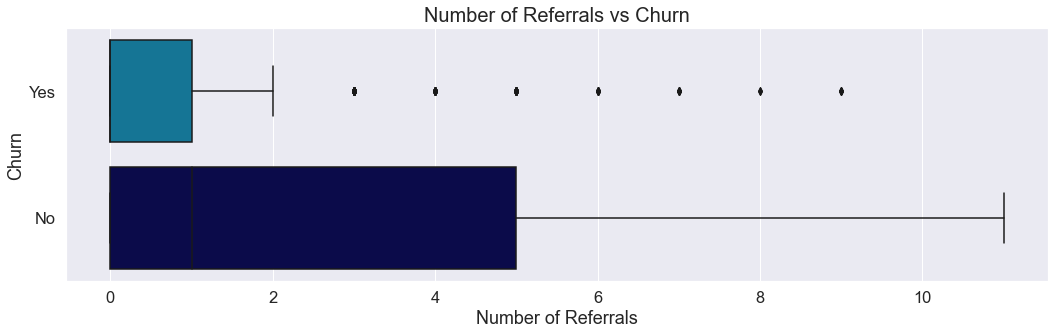

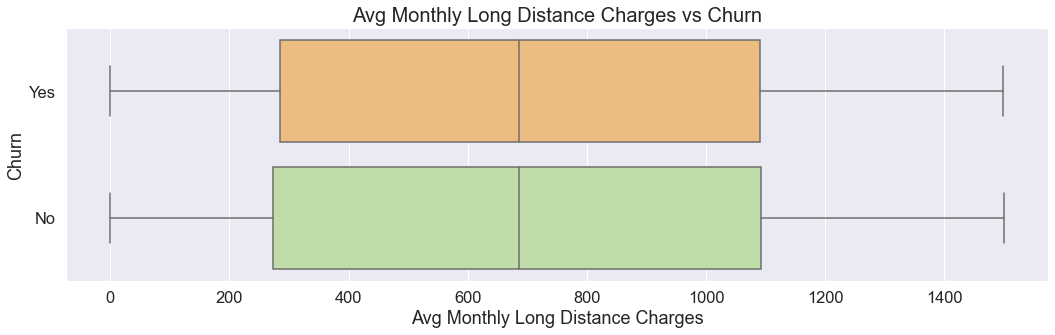

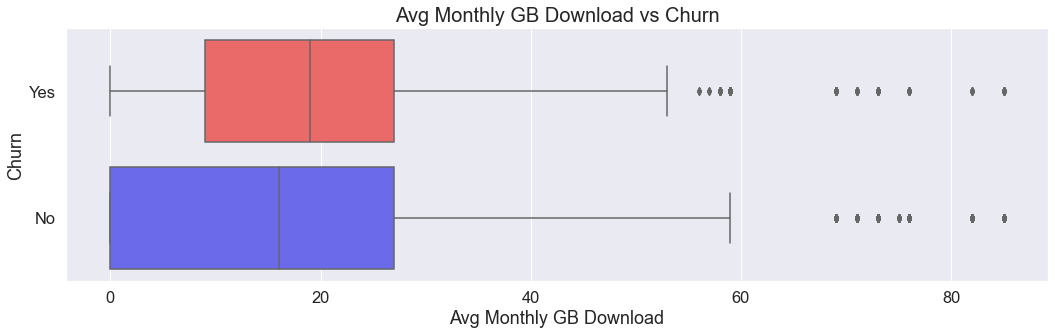

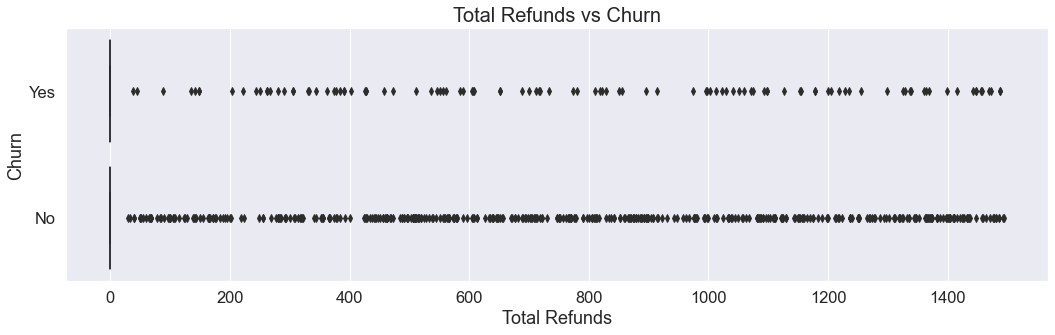

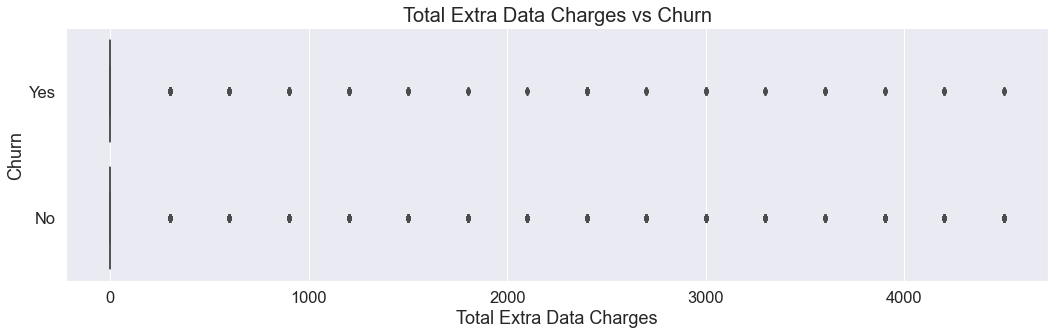

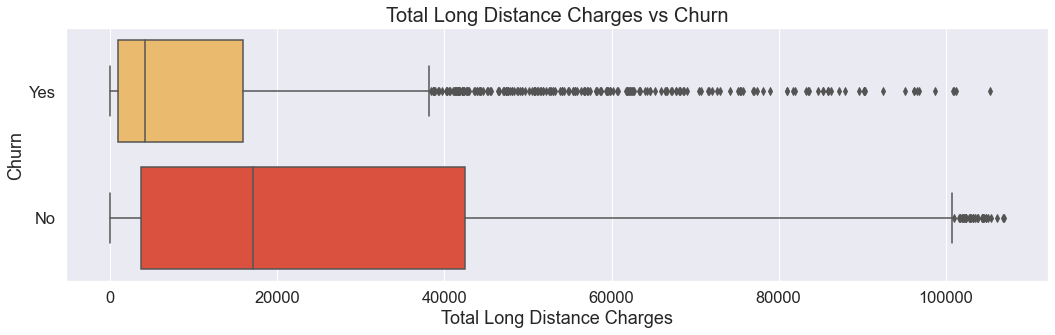

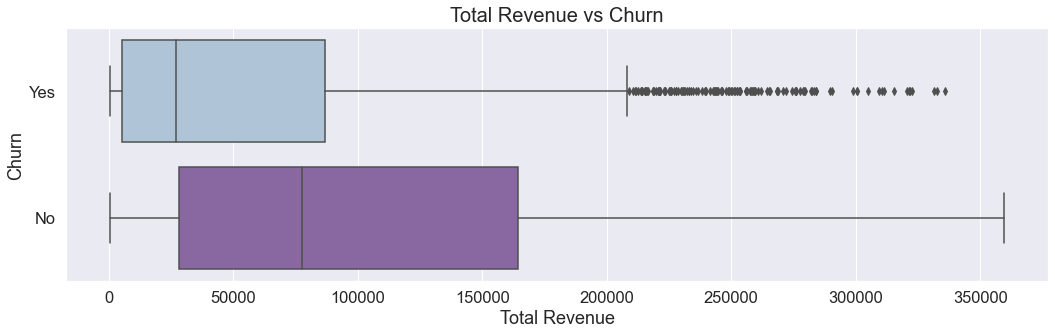

In [130]:
for feature in num_features:
    boxplot_vs_churn(feature)

In [132]:
def count_plots(feature):
    """
        For categorical feature vs output variable plots.
    """
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=df,x=feature, hue='Churn', palette = np.random.choice(palette_values))

    total = len(df)
    for p in ax.patches:
        percent = f'{100 * p.get_height() / total:.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percent, (x, y), ha = 'center', va = 'center', fontsize=15)
    plt.tight_layout()
    plt.title(f'{feature} VS Churn', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'Figures/PNG/{feature}_vs_churn.png')
    plt.savefig(f'Figures/SVG/{feature}_vs_churn.svg')
    plt.show()
    

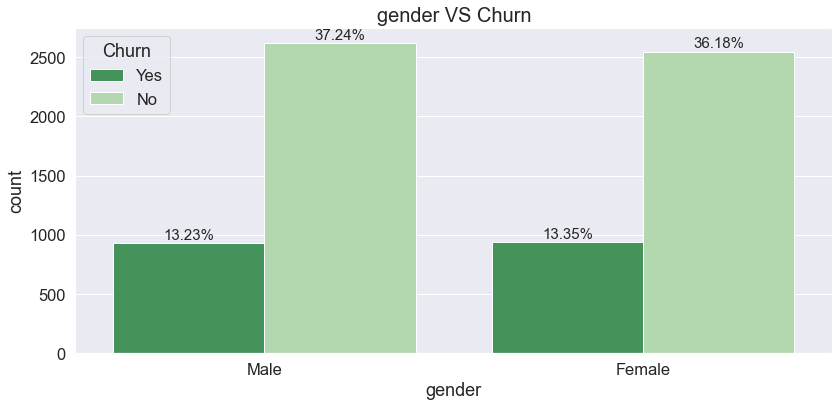

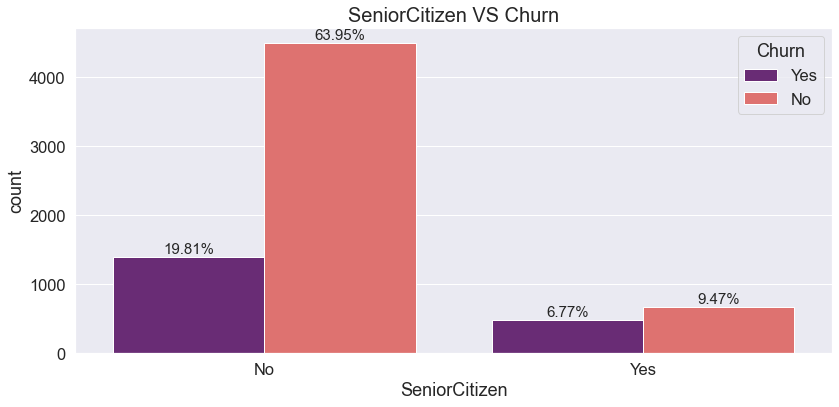

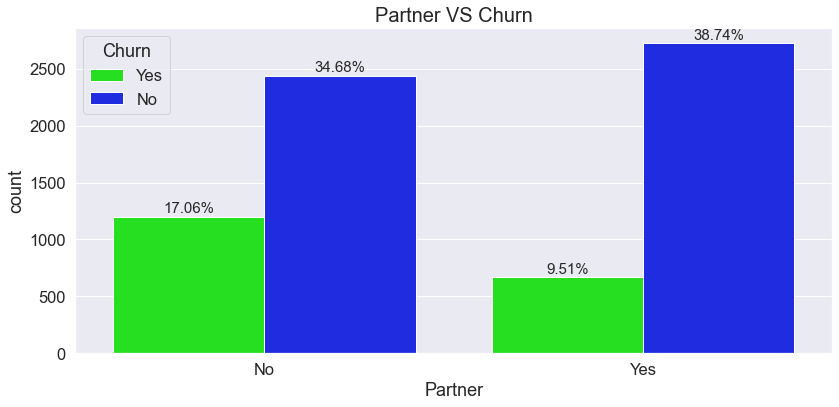

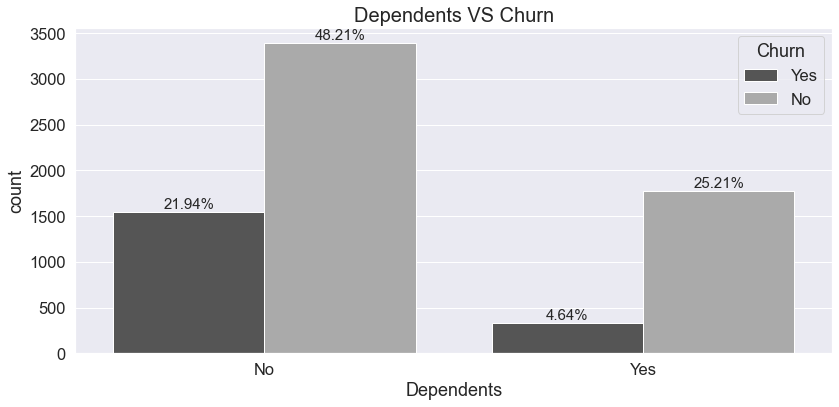

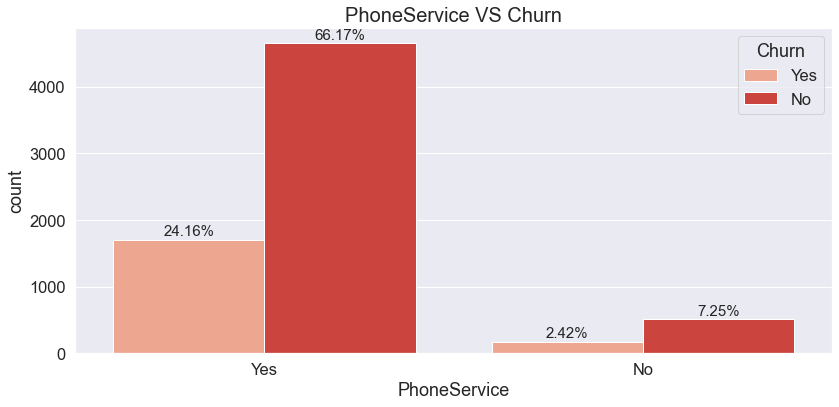

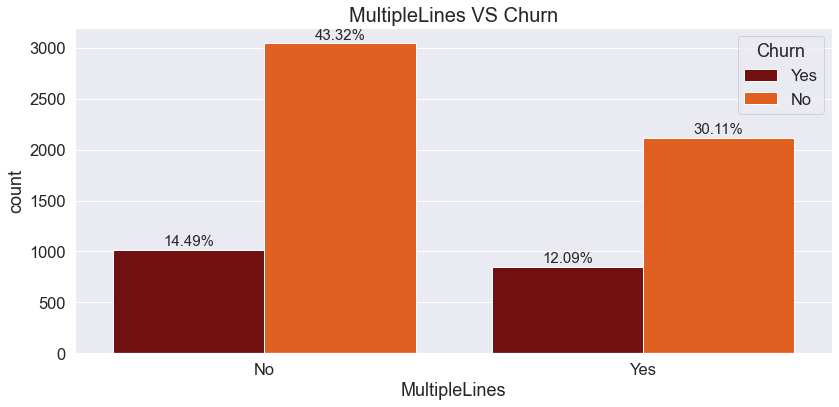

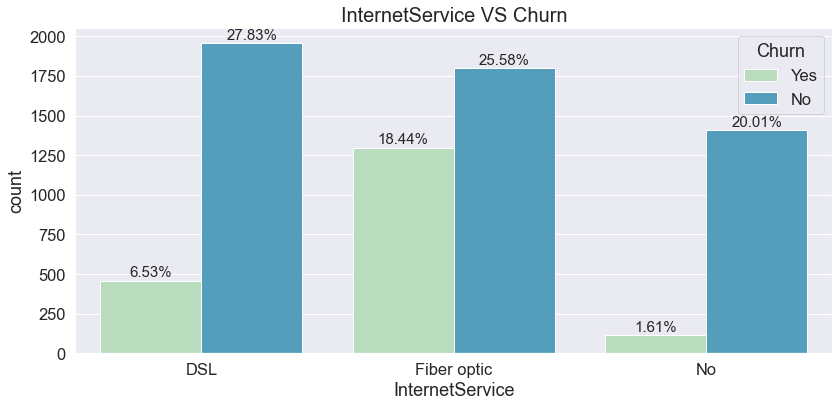

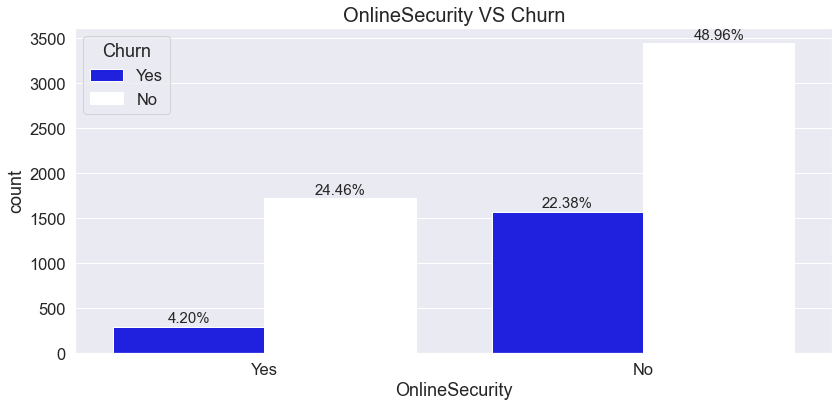

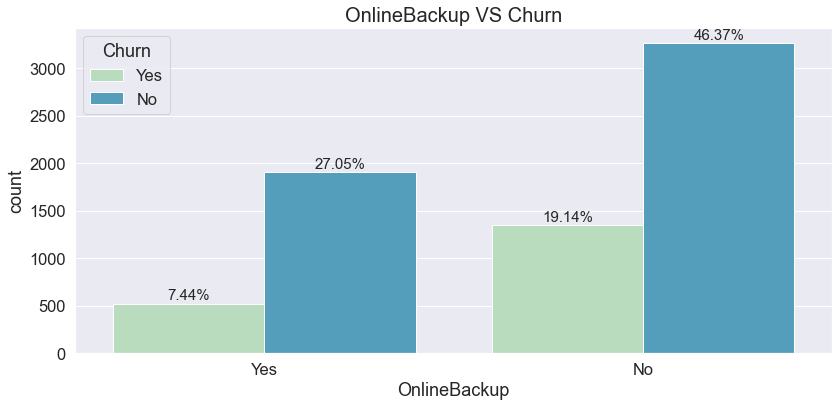

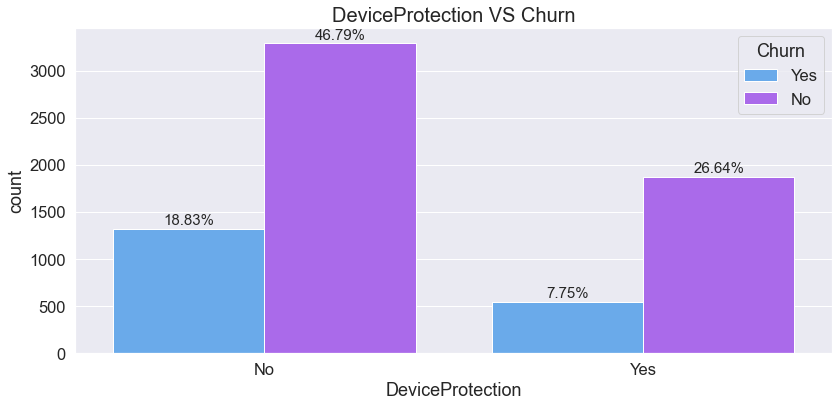

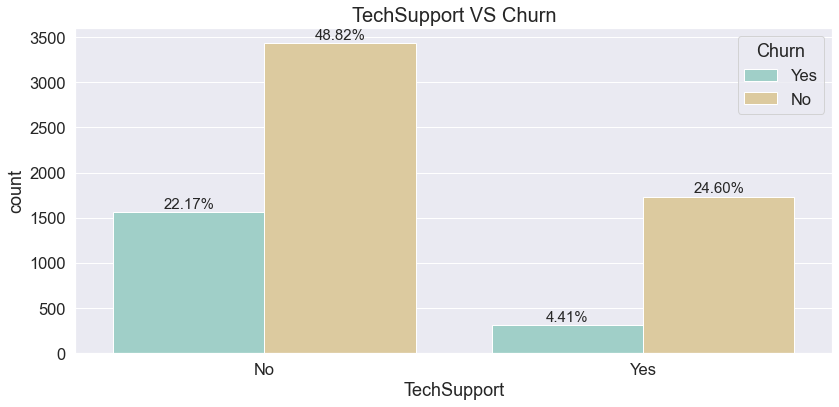

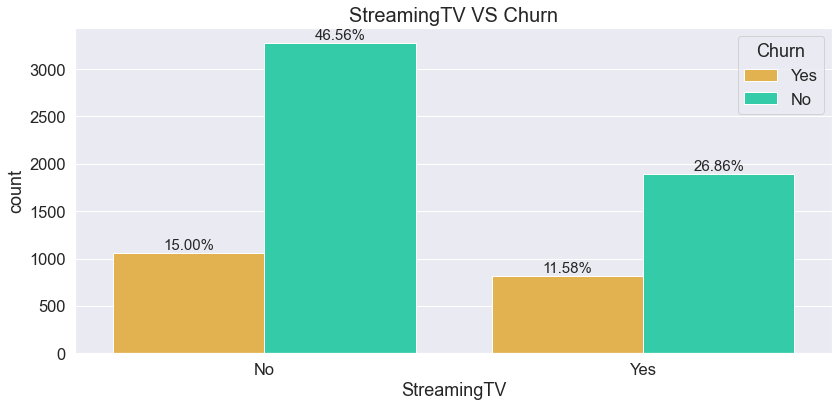

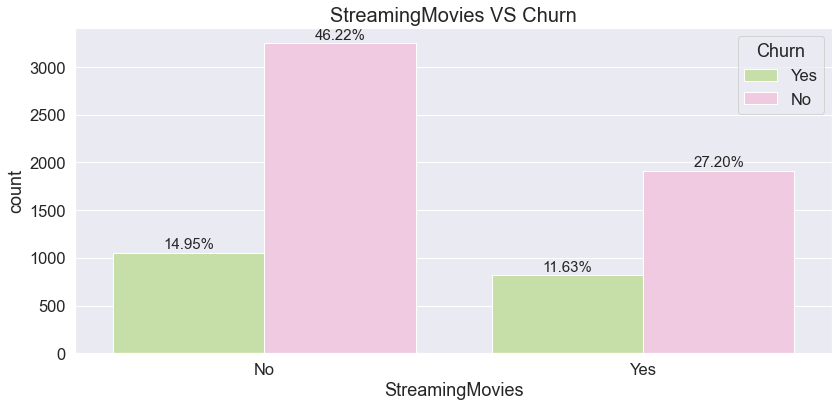

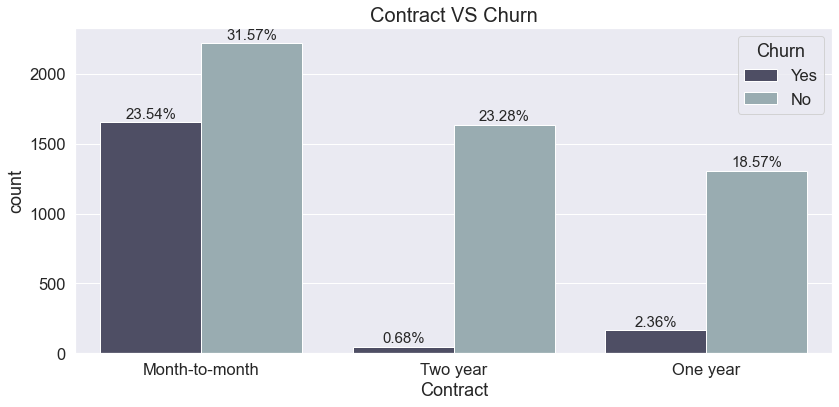

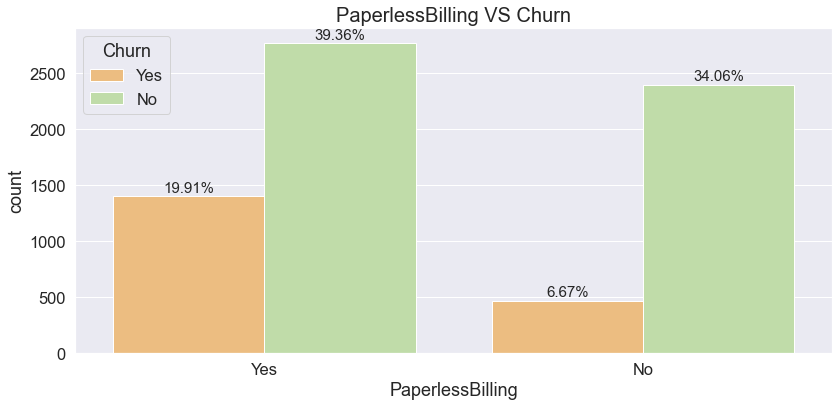

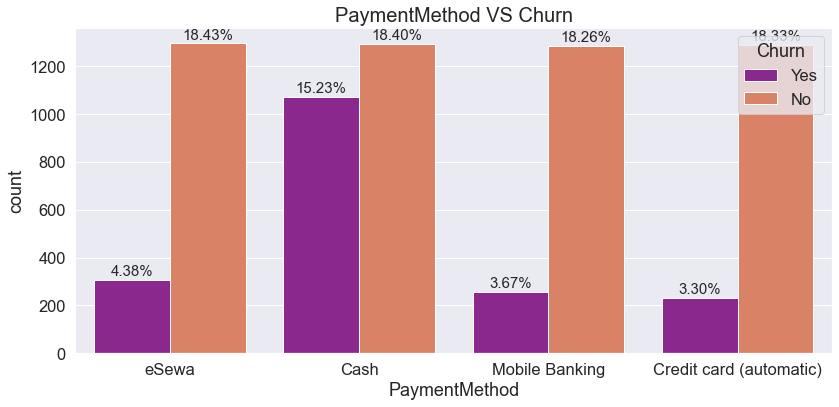

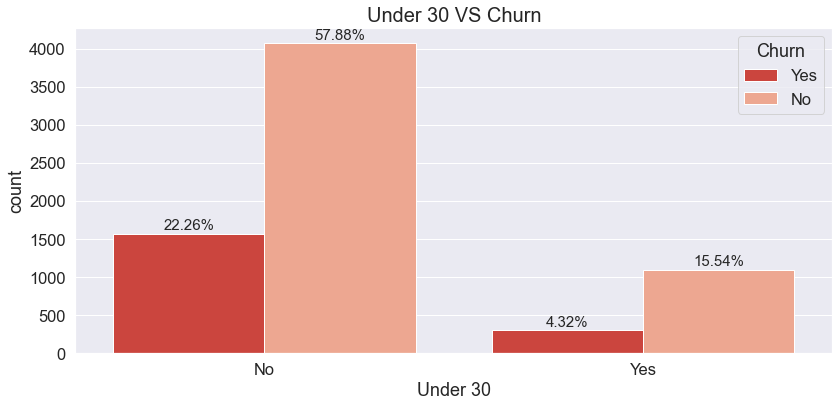

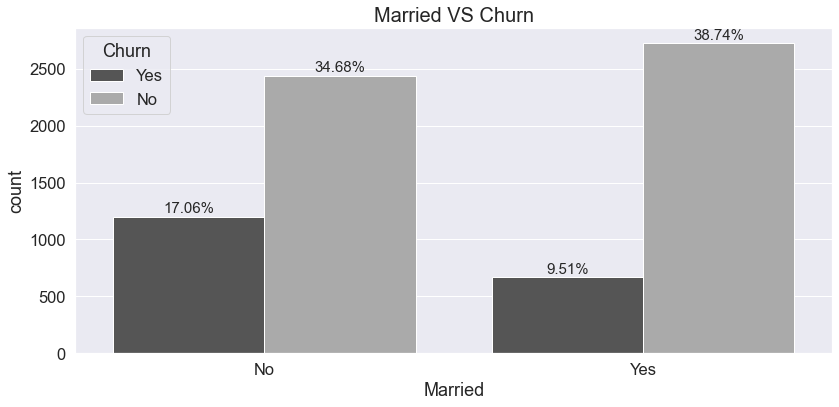

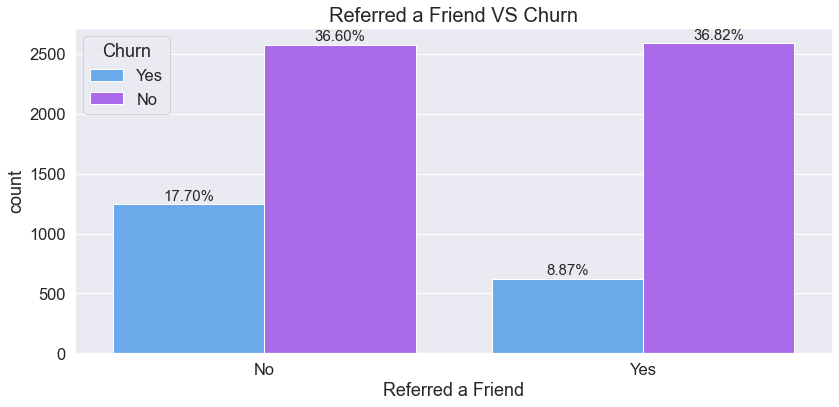

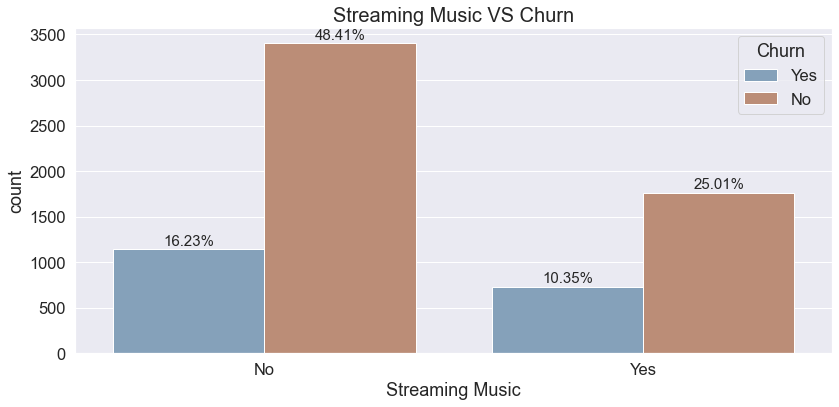

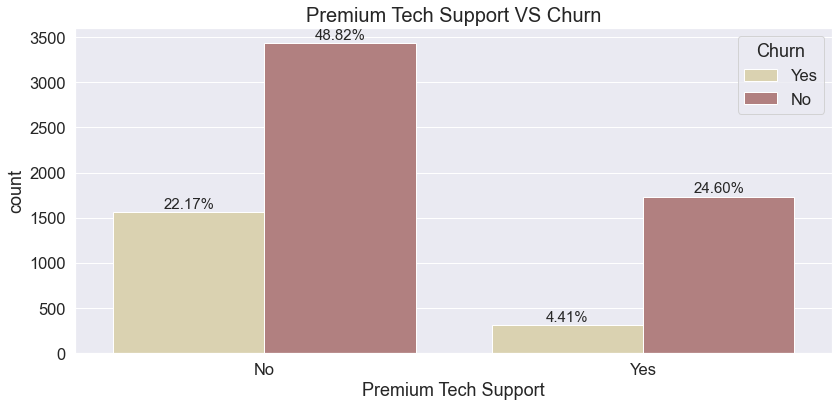

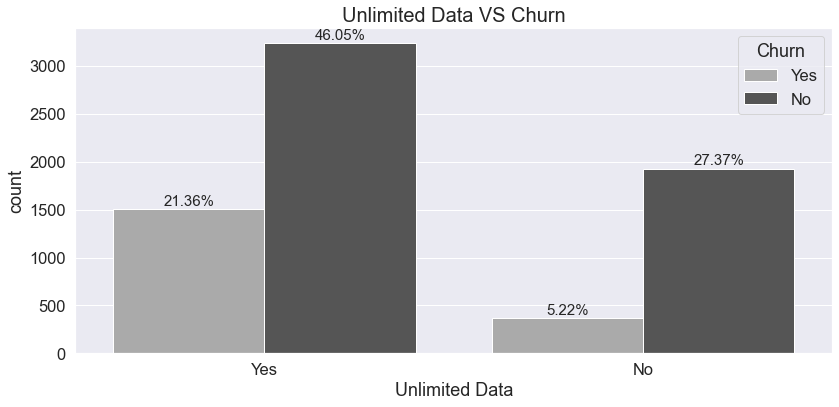

In [133]:
for feature in cat_features:
    count_plots(feature)

#### Target variable

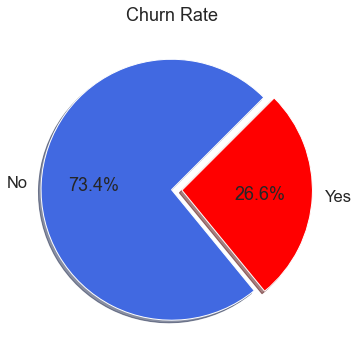

In [134]:
plt.figure(figsize=(6,6))
plt.pie(df["Churn"].value_counts(),shadow=True,startangle=45,
        labels=df["Churn"].value_counts().index,autopct='%0.1f%%',
        explode=(0,0.08),colors=['#4169e1','#ff0000'])
plt.title('Churn Rate')
plt.savefig('Figures/Churn_rate.png')
plt.show()

#### (Try to remove) outliers

In [135]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

In [136]:
num_columns

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Age',
 'Number of Referrals',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue']

In [53]:
for column in num_columns:
    for i, value in df[column].iteritems():
        z_score = np.abs(value - df[column].mean()) / df[column].std()
        replace = value
        # zscore > 3 is regarded as an outlier.
        if z_score >= 3:
            replace = np.nan
        df[column].at[i] = replace

NameError: name 'num_columns' is not defined

In [138]:
df.isnull().sum()

gender                                 0
SeniorCitizen                          0
Partner                                0
Dependents                             0
tenure                                 0
PhoneService                           0
MultipleLines                          0
InternetService                        0
OnlineSecurity                         0
OnlineBackup                           0
DeviceProtection                       0
TechSupport                            0
StreamingTV                            0
StreamingMovies                        0
Contract                               0
PaperlessBilling                       0
PaymentMethod                          0
MonthlyCharges                         0
TotalCharges                           0
Age                                    0
Under 30                               0
Married                                0
Referred a Friend                      0
Number of Referrals                    2
Avg Monthly Long

Total Refunds and Total Extra Data Charges have too many outliers, they'll be dropped later on.

df.drop(['TotalCharges', 'Total Revenue', 'Partner', 'Referred a Friend', 'Under 30', 'gender', 'SeniorCitizen', 'Total Refunds', 
    'Total Extra Data Charges', 'Avg Monthly Long Distance Charges', 'Total Long Distance Charges'], axis=1, inplace=True)

### REPLACE VALUES

In [142]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    if null_count:
        df[column].fillna(df[column].mean(), inplace=True)

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn
0,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,...,314.1,21.0,No,No,Yes,0.000000,0.0,628.2,3872.7,Yes
1,Female,No,No,No,2.0,Yes,No,Fiber optic,No,No,...,273.6,51.0,No,No,Yes,0.000000,0.0,547.2,5096.7,Yes
2,Female,No,No,No,8.0,Yes,Yes,Fiber optic,No,No,...,364.5,26.0,Yes,No,Yes,0.000000,0.0,2916.0,27531.0,Yes
3,Female,No,Yes,No,28.0,Yes,Yes,Fiber optic,No,No,...,146.7,47.0,Yes,Yes,Yes,0.000000,0.0,4107.6,95489.1,Yes
4,Male,No,No,No,49.0,Yes,Yes,Fiber optic,No,Yes,...,1329.9,11.0,Yes,No,Yes,0.000000,0.0,65165.1,216254.1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72.0,Yes,No,No,No,No,...,683.1,0.0,No,No,No,8.563155,0.0,49183.2,91185.9,No
7039,Male,No,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,...,1081.5,24.0,Yes,Yes,Yes,8.563155,0.0,25956.0,84224.1,No
7040,Female,No,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,...,889.8,59.0,Yes,No,Yes,8.563155,0.0,64065.6,283591.2,No
7041,Female,No,Yes,Yes,11.0,No,No,DSL,Yes,No,...,0.0,17.0,No,No,Yes,8.563155,0.0,0.0,9576.3,No


In [143]:
df.isnull().sum()

gender                               0
SeniorCitizen                        0
Partner                              0
Dependents                           0
tenure                               0
PhoneService                         0
MultipleLines                        0
InternetService                      0
OnlineSecurity                       0
OnlineBackup                         0
DeviceProtection                     0
TechSupport                          0
StreamingTV                          0
StreamingMovies                      0
Contract                             0
PaperlessBilling                     0
PaymentMethod                        0
MonthlyCharges                       0
TotalCharges                         0
Age                                  0
Under 30                             0
Married                              0
Referred a Friend                    0
Number of Referrals                  0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download  

Turn output into numerical value.

In [52]:
df['Churn'].replace({'Yes' : 1, 'No' : 0}, inplace = True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn
0,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,...,314.1,21,No,No,Yes,0.0,0,628.2,3872.7,1
1,Female,No,No,No,2.0,Yes,No,Fiber optic,No,No,...,273.6,51,No,No,Yes,0.0,0,547.2,5096.7,1
2,Female,No,No,No,8.0,Yes,Yes,Fiber optic,No,No,...,364.5,26,Yes,No,Yes,0.0,0,2916.0,27531.0,1
3,Female,No,Yes,No,28.0,Yes,Yes,Fiber optic,No,No,...,146.7,47,Yes,Yes,Yes,0.0,0,4107.6,95489.1,1
4,Male,No,No,No,49.0,Yes,Yes,Fiber optic,No,Yes,...,1329.9,11,Yes,No,Yes,0.0,0,65165.1,216254.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72.0,Yes,No,No,No,No,...,683.1,0,No,No,No,579.3,0,49183.2,91185.9,0
7039,Male,No,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,...,1081.5,24,Yes,Yes,Yes,1446.9,0,25956.0,84224.1,0
7040,Female,No,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,...,889.8,59,Yes,No,Yes,1361.4,0,64065.6,283591.2,0
7041,Female,No,Yes,Yes,11.0,No,No,DSL,Yes,No,...,0.0,17,No,No,Yes,817.2,0,0.0,9576.3,0


# 3. Feature Selection

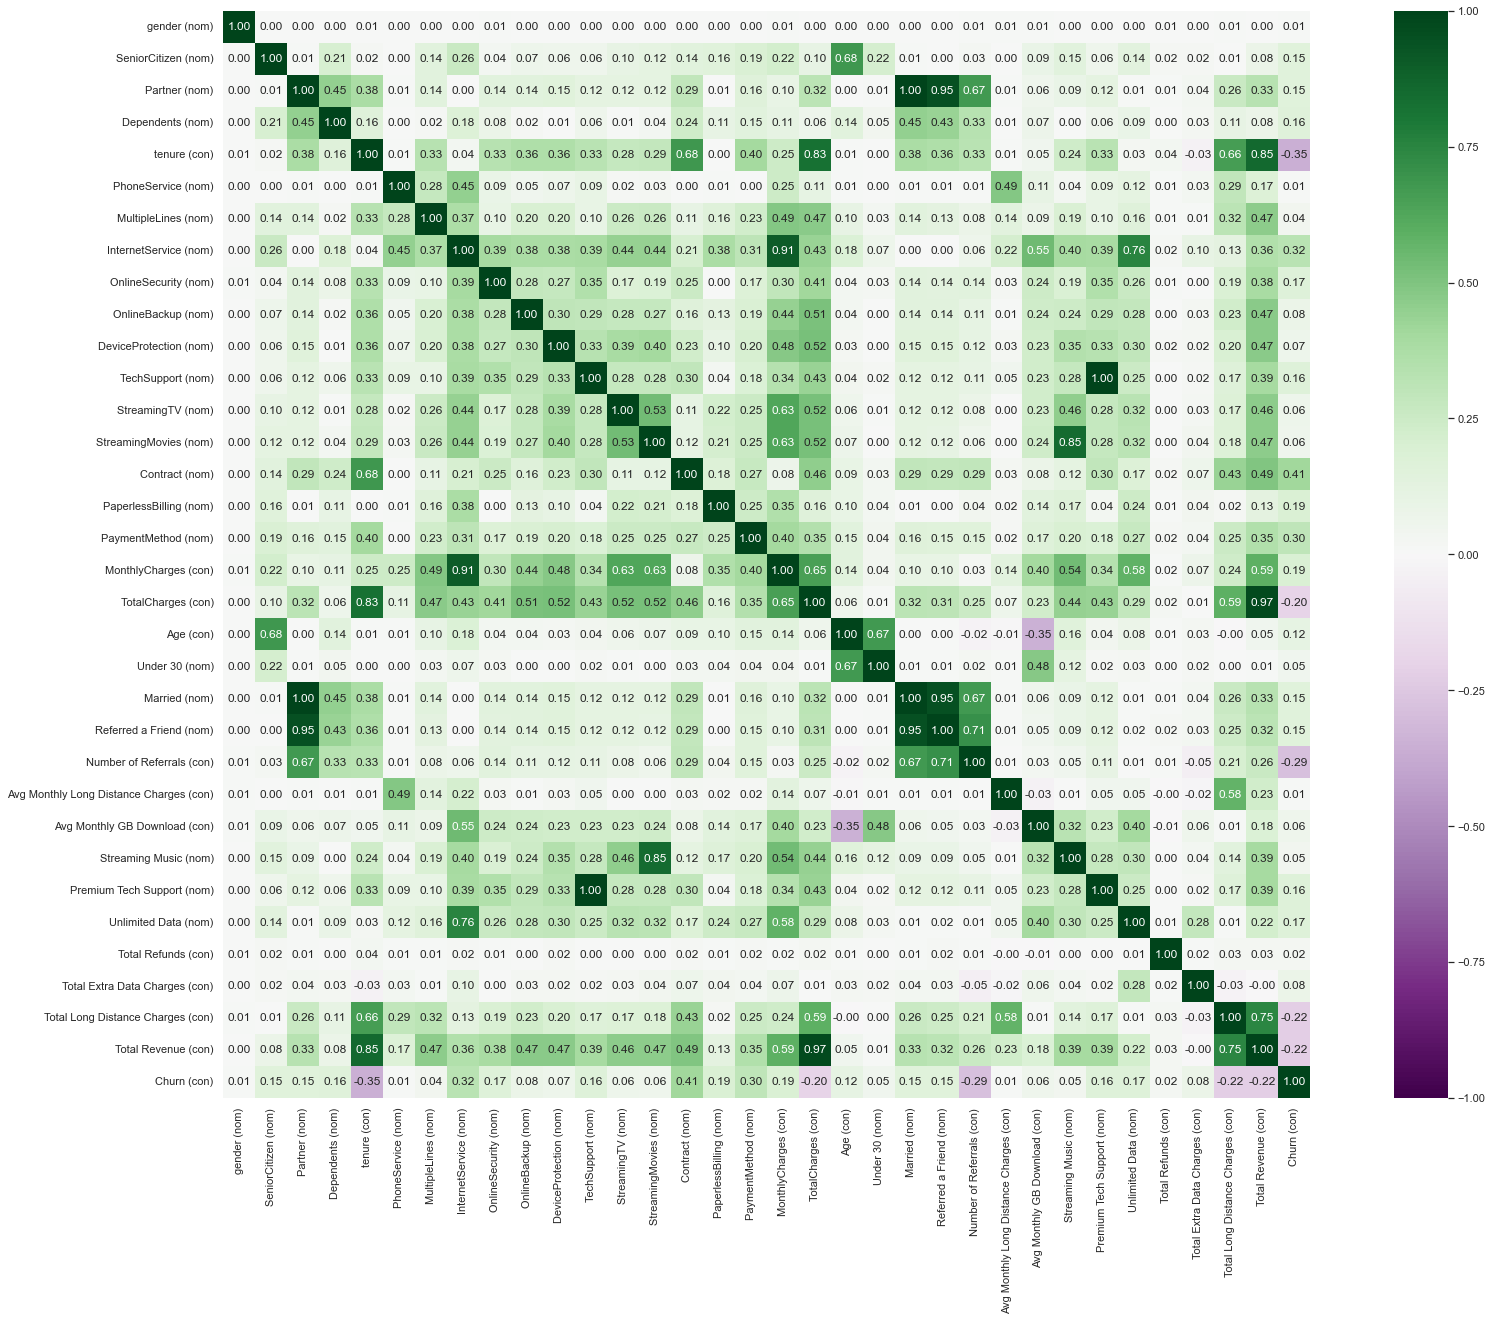

In [145]:
from dython import nominal
sns.set(font_scale = 1)
nominal.associations(df,figsize=(30,20),mark_columns=True, cmap = 'PRGn');

In [146]:
temp = df[df['Referred a Friend'] == 'Yes']

In [147]:
temp['Number of Referrals'].value_counts()

1.000000     1086
5.000000      261
3.000000      254
7.000000      248
9.000000      238
4.000000      235
2.000000      234
10.000000     223
6.000000      220
8.000000      212
1.946657        2
Name: Number of Referrals, dtype: int64

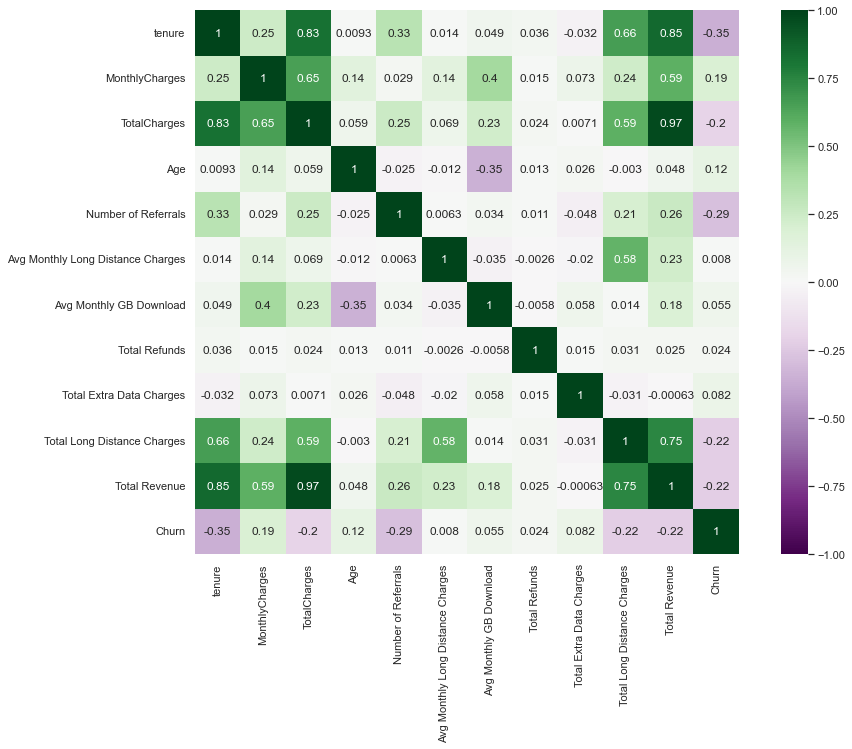

In [148]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, vmax = 1, vmin = -1, annot = True, cmap = 'PRGn', square = True, ax=ax)
plt.show()

Highly correlated variables: Total Revenue -> tenure, TotalCharges, Long Distance Charges

Married seems to be basically the same as having a partner.

Number of referrals > 0, if the person has actually referred to a friend, so it can be dropped as well.

Under 30 is a redundant feature since it can be found from Age.

Dropping TotalCharges, Total Revenue, Married, Referred a Friend

In [149]:
df.drop(['TotalCharges', 'Total Revenue', 'Partner', 'Referred a Friend', 'Under 30', 'gender', 'SeniorCitizen', 'Total Refunds', 
    'Total Extra Data Charges', 'Avg Monthly Long Distance Charges', 'Total Long Distance Charges'], axis=1, inplace=True)

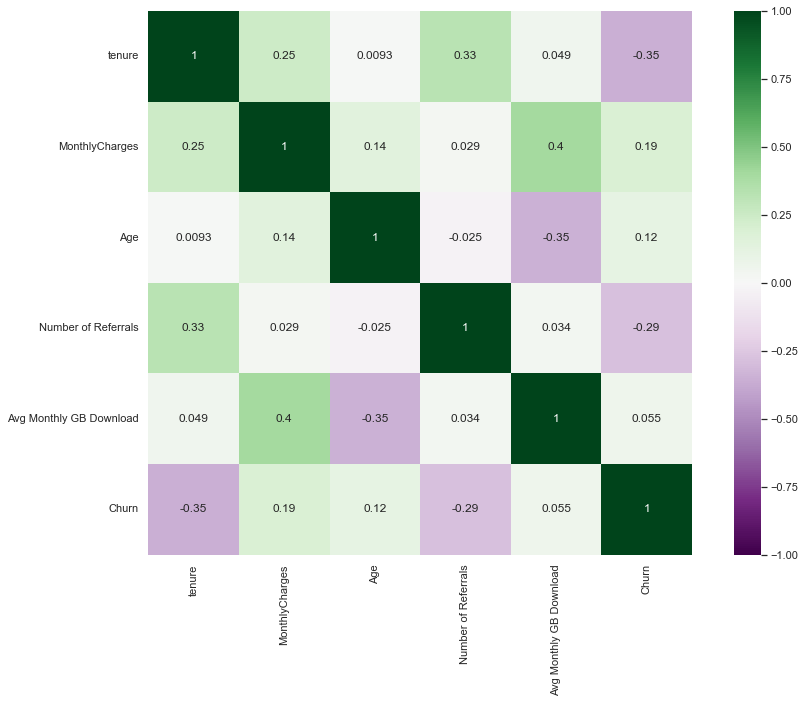

In [150]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, vmax = 1, vmin = -1, annot = True, cmap = 'PRGn', square = True, ax=ax)
plt.show()

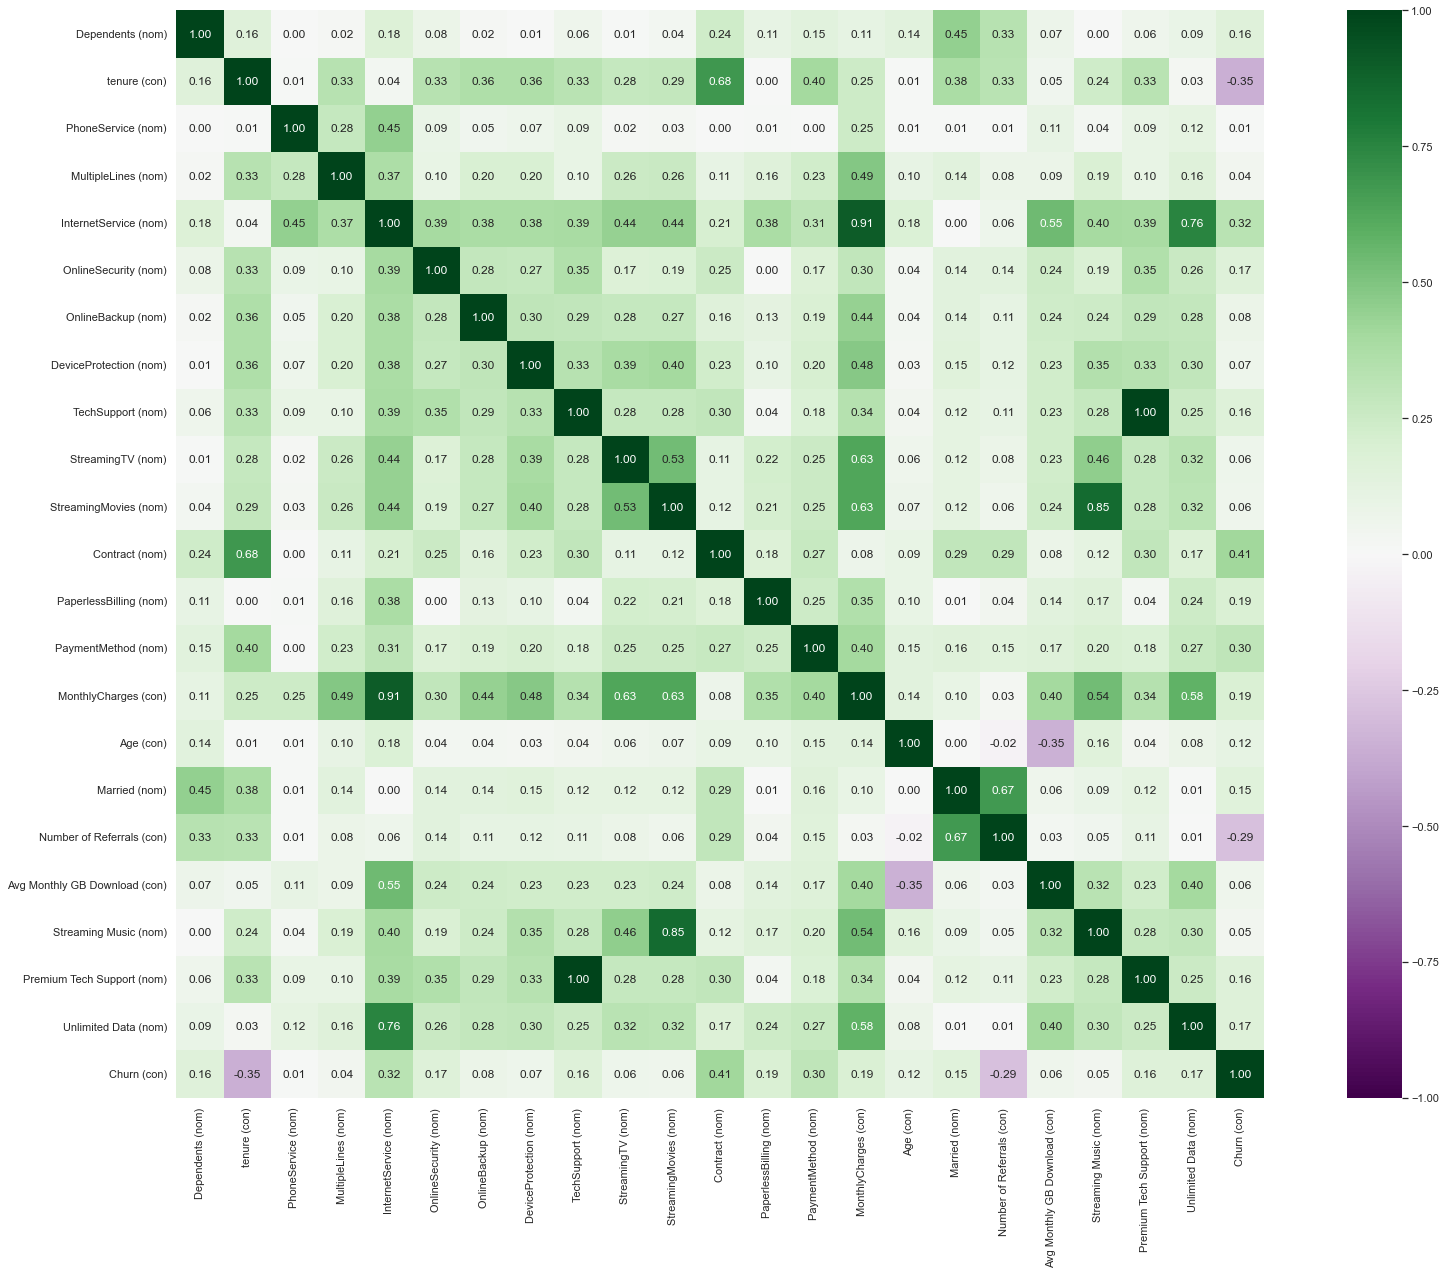

In [151]:
from dython import nominal
sns.set(font_scale = 1)
nominal.associations(df,figsize=(30,20),mark_columns=True, cmap = 'PRGn');

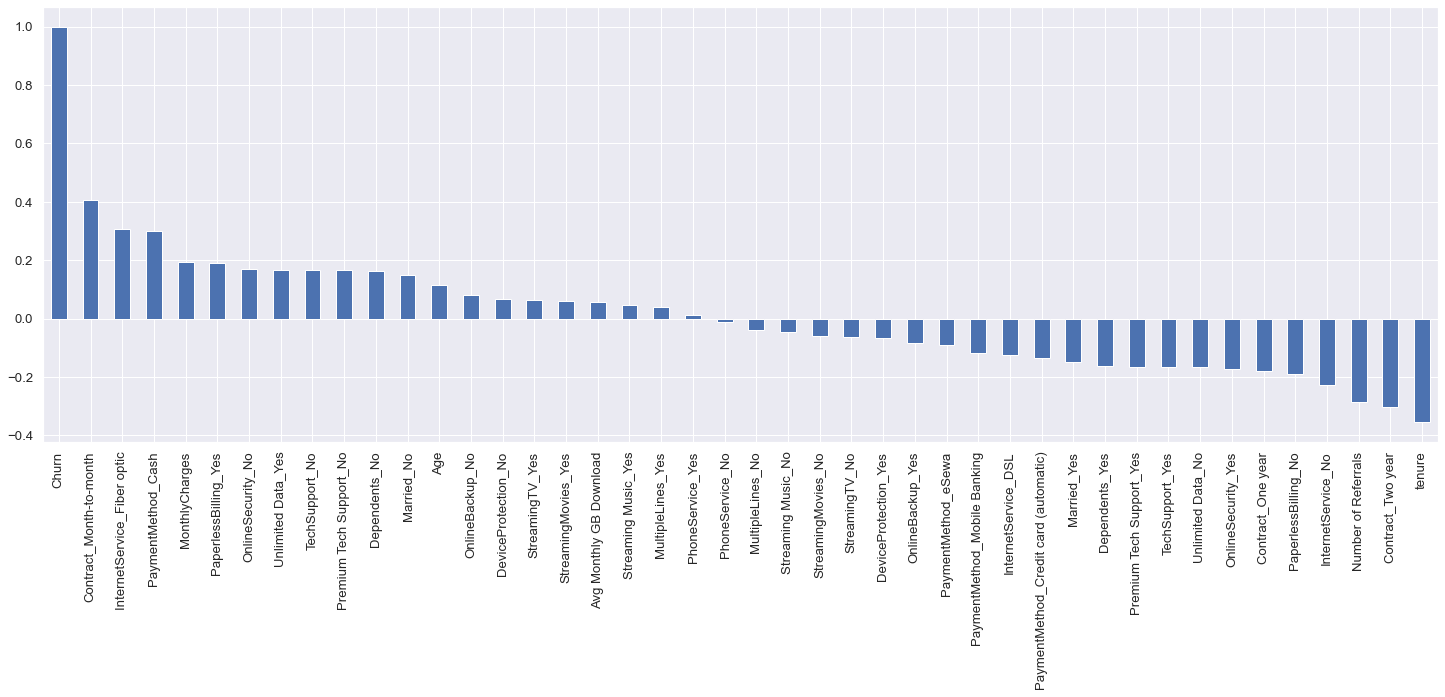

In [153]:
plt.figure(figsize = (25, 8))
df_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

### 'Concatenate' the streaming columns into one single column

In [154]:
streaming_cols = ['StreamingTV', 'StreamingMovies', 'Streaming Music']
df['StreamingTV'].replace({'Yes' : 1, 'No' : 0}, inplace=True)
df['StreamingMovies'].replace({'Yes' : 1, 'No' : 0}, inplace=True)
df['Streaming Music'].replace({'Yes' : 1, 'No' : 0}, inplace=True)
df

,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod,MonthlyCharges,Age,Married,Number of Referrals,Avg Monthly GB Download,Streaming Music,Premium Tech Support,Unlimited Data,Churn
0,No,2.0,Yes,No,DSL,Yes,Yes,No,No,0,...,eSewa,1615.5,37,No,0.0,21.0,0,No,Yes,1
1,No,2.0,Yes,No,Fiber optic,No,No,No,No,0,...,Cash,2121.0,19,No,0.0,51.0,0,No,Yes,1
2,No,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,1,...,Cash,2989.5,31,No,0.0,26.0,1,No,Yes,1
3,No,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,1,...,Cash,3144.0,23,Yes,0.0,47.0,1,Yes,Yes,1
4,No,49.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,1,...,Mobile Banking,3111.0,38,No,0.0,11.0,1,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,72.0,Yes,No,No,No,No,No,No,0,...,Mobile Banking,634.5,30,No,0.0,0.0,0,No,No,0
7039,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,1,...,eSewa,2544.0,38,Yes,1.0,24.0,1,Yes,Yes,0
7040,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,1,...,Credit card (automatic),3096.0,30,Yes,4.0,59.0,1,No,Yes,0
7041,Yes,11.0,No,No,DSL,Yes,No,No,No,0,...,Cash,888.0,32,Yes,1.0,17.0,0,No,Yes,0


## BITWISE OPERATION!

Check if the customer has any streaming services using **BITWISE OPERATIONS**

In [155]:
temp_col = (df['StreamingTV'] | df['StreamingMovies'] | df['Streaming Music'])
temp_col.value_counts()

1    3594
0    3438
dtype: int64

In [156]:
df.drop(streaming_cols, axis=1, inplace=True)
df

,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Age,Married,Number of Referrals,Avg Monthly GB Download,Premium Tech Support,Unlimited Data,Churn
0,No,2.0,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,eSewa,1615.5,37,No,0.0,21.0,No,Yes,1
1,No,2.0,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Cash,2121.0,19,No,0.0,51.0,No,Yes,1
2,No,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Cash,2989.5,31,No,0.0,26.0,No,Yes,1
3,No,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Cash,3144.0,23,Yes,0.0,47.0,Yes,Yes,1
4,No,49.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Mobile Banking,3111.0,38,No,0.0,11.0,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,72.0,Yes,No,No,No,No,No,No,Two year,Yes,Mobile Banking,634.5,30,No,0.0,0.0,No,No,0
7039,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,One year,Yes,eSewa,2544.0,38,Yes,1.0,24.0,Yes,Yes,0
7040,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),3096.0,30,Yes,4.0,59.0,No,Yes,0
7041,Yes,11.0,No,No,DSL,Yes,No,No,No,Month-to-month,Yes,Cash,888.0,32,Yes,1.0,17.0,No,Yes,0


In [157]:
df.insert(loc=6, column='StreamingServices', value=temp_col)
df

,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,StreamingServices,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,PaymentMethod,MonthlyCharges,Age,Married,Number of Referrals,Avg Monthly GB Download,Premium Tech Support,Unlimited Data,Churn
0,No,2.0,Yes,No,DSL,Yes,0,Yes,No,No,...,Yes,eSewa,1615.5,37,No,0.0,21.0,No,Yes,1
1,No,2.0,Yes,No,Fiber optic,No,0,No,No,No,...,Yes,Cash,2121.0,19,No,0.0,51.0,No,Yes,1
2,No,8.0,Yes,Yes,Fiber optic,No,1,No,Yes,No,...,Yes,Cash,2989.5,31,No,0.0,26.0,No,Yes,1
3,No,28.0,Yes,Yes,Fiber optic,No,1,No,Yes,Yes,...,Yes,Cash,3144.0,23,Yes,0.0,47.0,Yes,Yes,1
4,No,49.0,Yes,Yes,Fiber optic,No,1,Yes,Yes,No,...,Yes,Mobile Banking,3111.0,38,No,0.0,11.0,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,72.0,Yes,No,No,No,0,No,No,No,...,Yes,Mobile Banking,634.5,30,No,0.0,0.0,No,No,0
7039,Yes,24.0,Yes,Yes,DSL,Yes,1,No,Yes,Yes,...,Yes,eSewa,2544.0,38,Yes,1.0,24.0,Yes,Yes,0
7040,Yes,72.0,Yes,Yes,Fiber optic,No,1,Yes,Yes,No,...,Yes,Credit card (automatic),3096.0,30,Yes,4.0,59.0,No,Yes,0
7041,Yes,11.0,No,No,DSL,Yes,0,No,No,No,...,Yes,Cash,888.0,32,Yes,1.0,17.0,No,Yes,0


In [158]:
df['StreamingServices'] = df['StreamingServices'].replace({0 : 'No', 1 : 'Yes'})
df

,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,StreamingServices,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,PaymentMethod,MonthlyCharges,Age,Married,Number of Referrals,Avg Monthly GB Download,Premium Tech Support,Unlimited Data,Churn
0,No,2.0,Yes,No,DSL,Yes,No,Yes,No,No,...,Yes,eSewa,1615.5,37,No,0.0,21.0,No,Yes,1
1,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,...,Yes,Cash,2121.0,19,No,0.0,51.0,No,Yes,1
2,No,8.0,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,...,Yes,Cash,2989.5,31,No,0.0,26.0,No,Yes,1
3,No,28.0,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,...,Yes,Cash,3144.0,23,Yes,0.0,47.0,Yes,Yes,1
4,No,49.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,...,Yes,Mobile Banking,3111.0,38,No,0.0,11.0,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,72.0,Yes,No,No,No,No,No,No,No,...,Yes,Mobile Banking,634.5,30,No,0.0,0.0,No,No,0
7039,Yes,24.0,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,...,Yes,eSewa,2544.0,38,Yes,1.0,24.0,Yes,Yes,0
7040,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,...,Yes,Credit card (automatic),3096.0,30,Yes,4.0,59.0,No,Yes,0
7041,Yes,11.0,No,No,DSL,Yes,No,No,No,No,...,Yes,Cash,888.0,32,Yes,1.0,17.0,No,Yes,0


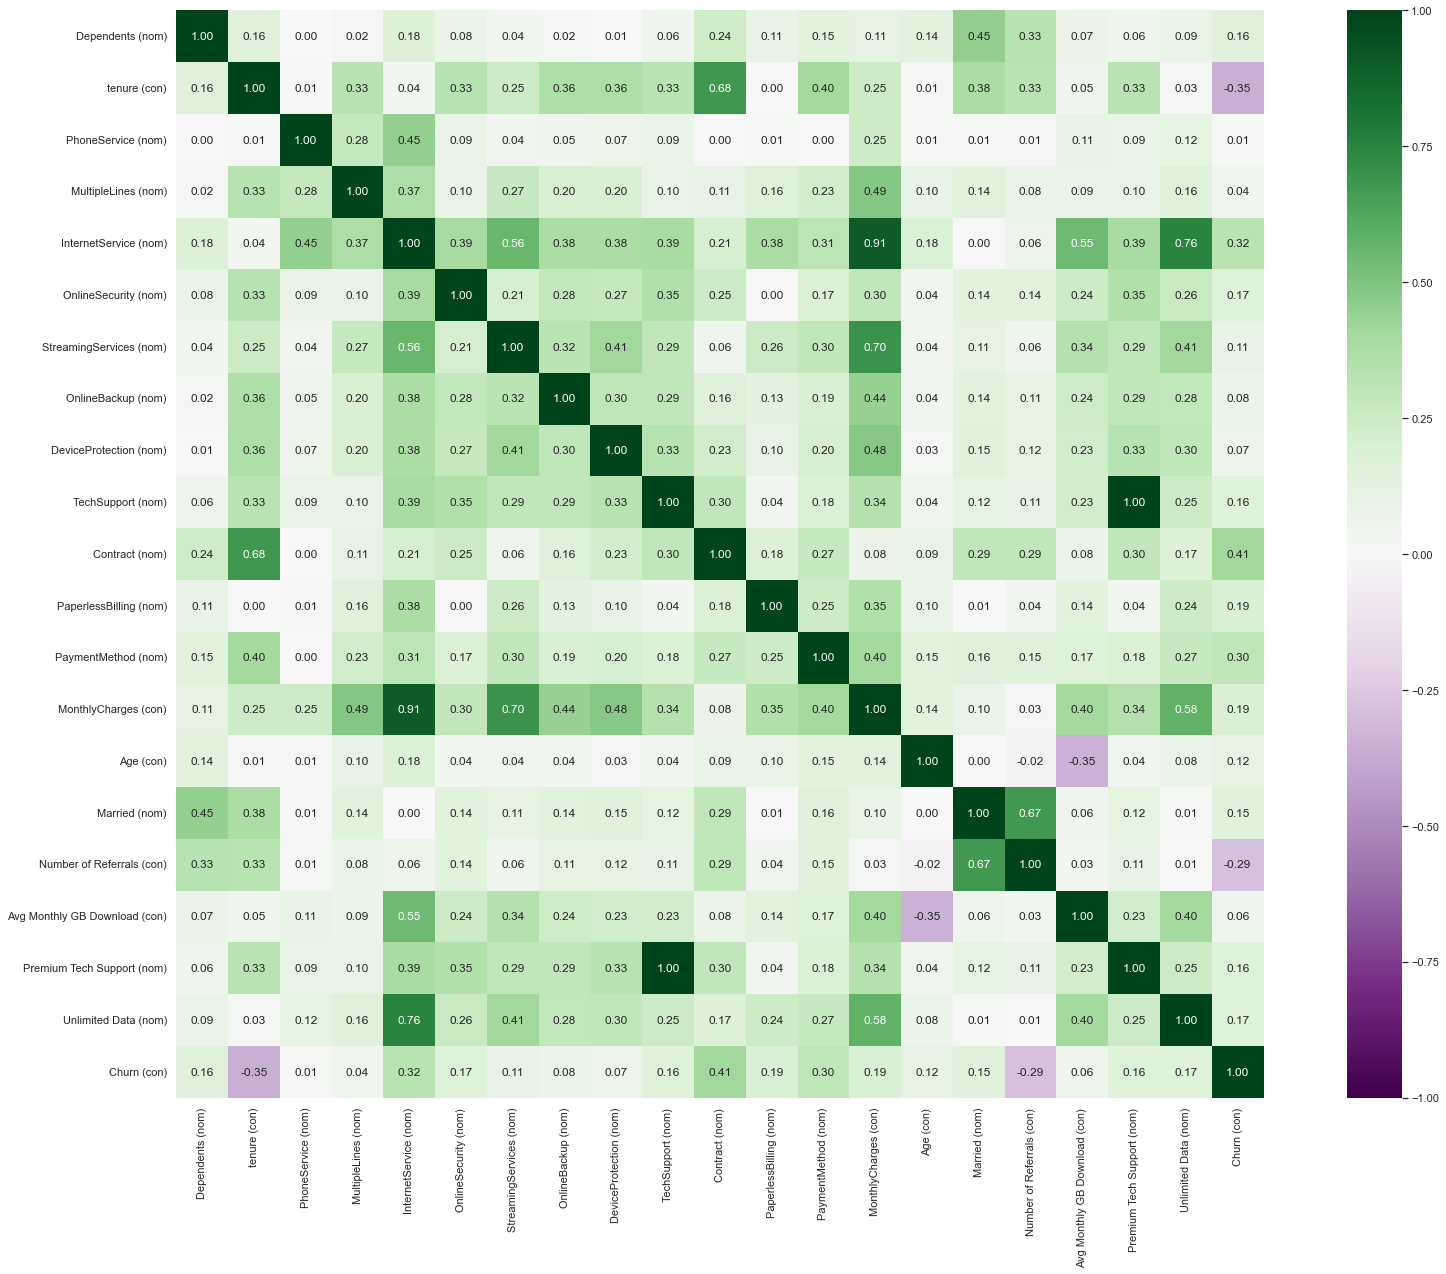

In [159]:
sns.set(font_scale = 1)
nominal.associations(df,figsize=(30,20),mark_columns=True, cmap = 'PRGn');

### Save the dataset.

In [160]:
df.to_csv('Dataset_ready.csv', index=False)

# 4. Modelling

In [161]:
# Separate the features and the target. Then perfrom the train-test split
X = df.drop('Churn', axis = 1)
y = df.Churn

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    X , y, test_size = 0.25, stratify = y, random_state = 98765
)
X_train_org = X_train
y_train_org = y_train

### Pipelines and Sampling

In [163]:
ordinal_columns, onehot_columns = list(), list()

cat_features = X_train.select_dtypes(include = 'object').columns.tolist()
num_features = X_train.select_dtypes(exclude = 'object').columns.tolist()

# Onehot encode attributes which have more than two unique values.
for col in cat_features:
    unique_values = df[col].nunique()
    if unique_values == 2:
        ordinal_columns.append(col)
    else:
        onehot_columns.append(col)

num_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1)))
])

onehot_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(missing_values=None, strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

ordinal_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(missing_values=None, strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

processor = ColumnTransformer(transformers = [
    ('numerical', num_pipeline, num_features),      # scale Numerical values
    ('ordinal', ordinal_pipeline, ordinal_columns), # Ordinal
    ('onehot', onehot_pipeline, onehot_columns)     # One-hot encode
])

# oversample the minority class
over = RandomOverSampler(sampling_strategy=0.9)
# undersample the majority class
under = RandomUnderSampler(sampling_strategy=0.999)

from imblearn.pipeline import Pipeline as ImbPipeline

sampler = ImbPipeline(steps = [
    ('over', over),
    ('under', under)
    # ('SMOTE', sm)
])

X_train, y_train = sampler.fit_resample(X_train_org, y_train_org)

### Create a model just to get the total column names

In [164]:
dummy_model = Pipeline(steps = [
    ('processor', processor),
    ('LR', LogisticRegression())
])
_ = dummy_model.fit(X_train, y_train)

onehot_columns2 = list(dummy_model.named_steps['processor'].named_transformers_['onehot'].named_steps['encoder'].get_feature_names(input_features=onehot_columns))
numeric_features_list_final = list(num_features)
numeric_features_list_final.extend(ordinal_columns)
numeric_features_list_final.extend(onehot_columns2)
print(numeric_features_list_final)

['tenure', 'MonthlyCharges', 'Age', 'Number of Referrals', 'Avg Monthly GB Download', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'StreamingServices', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Married', 'Premium Tech Support', 'Unlimited Data', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Cash', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mobile Banking', 'PaymentMethod_eSewa']


In [165]:
# perform data transform on training set
encoded_X_train = processor.fit_transform(X_train_org)

#### df_temp is the dataframe after doing the data transform.

In [166]:
df_temp = pd.DataFrame(encoded_X_train, columns=numeric_features_list_final)
df_temp

,tenure,MonthlyCharges,Age,Number of Referrals,Avg Monthly GB Download,Dependents,PhoneService,MultipleLines,OnlineSecurity,StreamingServices,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Cash,PaymentMethod_Credit card (automatic),PaymentMethod_Mobile Banking,PaymentMethod_eSewa
0,0.028169,0.361236,0.737705,0.0,0.394737,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.042254,0.200797,0.606557,0.3,0.697368,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.014085,0.651719,0.934426,0.0,0.184211,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.605634,0.661684,0.573770,0.0,0.078947,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.464789,0.866467,0.459016,0.0,0.276316,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,0.746479,0.412556,0.688525,0.9,0.276316,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5270,0.492958,0.767314,0.639344,0.4,0.157895,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5271,0.126761,0.010962,0.639344,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5272,0.492958,0.359243,0.344262,0.0,0.276316,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [167]:
df_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5274.0,0.447940,0.346952,0.0,0.112676,0.408451,0.774648,1.0
MonthlyCharges,5274.0,0.466211,0.299733,0.0,0.185974,0.519183,0.714001,1.0
Age,5274.0,0.450602,0.274371,0.0,0.213115,0.442623,0.672131,1.0
Number of Referrals,5274.0,0.194594,0.298417,0.0,0.000000,0.000000,0.300000,1.0
Avg Monthly GB Download,5274.0,0.260170,0.252685,0.0,0.052632,0.223684,0.355263,1.0
Dependents,5274.0,0.298445,0.457619,0.0,0.000000,0.000000,1.000000,1.0
PhoneService,5274.0,0.902541,0.296610,0.0,1.000000,1.000000,1.000000,1.0
MultipleLines,5274.0,0.422071,0.493936,0.0,0.000000,0.000000,1.000000,1.0
OnlineSecurity,5274.0,0.291998,0.454725,0.0,0.000000,0.000000,1.000000,1.0
StreamingServices,5274.0,0.520667,0.499620,0.0,0.000000,1.000000,1.000000,1.0


In [168]:
y_train.value_counts()

0    3487
1    3484
Name: Churn, dtype: int64

In [169]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [170]:
models = list()
state = 115699

voting_models = (
    ('LR', LogisticRegression(class_weight='balanced', random_state=state)),
    ('GNB', SGDClassifier(loss='log', class_weight='balanced', max_iter=5_000, random_state=state))
)

models.append(('Voting', VotingClassifier(estimators=voting_models, voting='soft', weights=(1, 1))))
models.append(('LR', LogisticRegression(class_weight='balanced', random_state=state)))
models.append(('SGD', SGDClassifier(loss='log', class_weight='balanced', random_state=state, warm_start=True)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(class_weight='balanced', random_state=state)))
models.append(('GNB', GaussianNB()))
models.append(('SVM (RBF)', SVC(class_weight='balanced', random_state=state)))  
models.append(('ADA', AdaBoostClassifier(random_state=state)))
models.append(('GB', GradientBoostingClassifier(random_state=state)))
models.append(('RF', RandomForestClassifier(class_weight='balanced', random_state=state))) 
models.append(('XGB', XGBClassifier(verbosity = 0, random_state=state)))
models.append(('LGB', LGBMClassifier(class_weight='balanced', random_state=state)))

In [171]:
names = list()

# Get indices of categorical features
idx = df.columns.get_indexer(df.select_dtypes('object').columns)

cv_scores_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Bal. accuracy', 'Precision', 'Recall', 'F1', 'F2', 'ROC_AUC'])

metrics = {
    'accuracy' : 'accuracy',
    'balanced_accuracy' : 'balanced_accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1',
    'f2' : make_scorer(fbeta_score, beta = 2),
    'roc_auc' : 'roc_auc'
}
acc_score, b_acc_score, prec_score, reca_score, f1_scores, f2_score, roc_score = list(), list(), list(), list(), list(), list(), list()

for index, (name, model) in enumerate(models):
    pipeline = ImbPipeline(steps = [
        ('processor', processor),
        ('SMOTE', SMOTE(k_neighbors=7, random_state=state)),
        ('under', RandomUnderSampler(sampling_strategy=0.99999, random_state=state)),
        (name, model)
    ])

    start = time.perf_counter()
    print(f'Cross-validating {name}...', end =' ')
    kfold = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 244466666)
    scores = cross_validate(pipeline, X, y, scoring = metrics, cv = kfold, verbose=0, error_score='raise')
    end = time.perf_counter()

    accuracy = scores['test_accuracy'] * 100
    bal_accuracy = scores['test_balanced_accuracy'] * 100
    precision = scores['test_precision'] * 100
    recall = scores['test_recall'] * 100
    f1 = scores['test_f1'] * 100
    roc = scores['test_roc_auc'] * 100
    f2 = scores['test_f2'] * 100

    acc_score.append(accuracy)
    b_acc_score.append(bal_accuracy)
    prec_score.append(precision)
    reca_score.append(recall)
    f1_scores.append(f1)
    f2_score.append(f2)
    roc_score.append(roc)
    names.append(name)

    acc_string = f'{accuracy.mean():.6f}\n({accuracy.std():.6f})'
    bal_acc_string = f'{bal_accuracy.mean():.6f}\n({bal_accuracy.std():.6f})'
    prec_string = f'{precision.mean():.6f}\n({precision.std():.6f})'
    rec_string = f'{recall.mean():.6f}\n({recall.std():.6f})'
    f1_string = f'{f1.mean():.6f}\n({f1.std():.6f})'
    f2_string = f'{f2.mean():.6f}\n({f2.std():.6f})'
    roc_string = f'{roc.mean():.6f}\n({roc.std():.6f})'

    print(f'done!')
    time_taken = end - start
    print(f'Time taken: {time_taken:.2f} seconds.\n')

    cv_scores_df.loc[index] = [name, acc_string, bal_acc_string, prec_string, rec_string, f1_string, f2_string, roc_string]
    
    # print(f'For {name}:')
    # print(f'Accuracy          = {accuracy.mean():.6f} ({accuracy.std():.6f})')
    # print(f'Balanced accuracy = {bal_accuracy.mean():.6f} ({bal_accuracy.std():.6f})')
    # print(f'Precision         = {precision.mean():.6f} ({precision.std():.6f})')
    # print(f'Recall            = {recall.mean():.6f} ({recall.std():.6f})')
    # print(f'F1                = {f1.mean():.6f} ({f1.std():.6f})')
    # print(f'F2                = {f2.mean():.6f} ({f2.std():.6f})')
    # print(f'ROC_AUC           = {roc.mean():.6f} ({roc.std():.6f})\n')
pretty_print(cv_scores_df)

Cross-validating Voting... done!
Time taken: 38.32 seconds.

Cross-validating LR... done!
Time taken: 35.49 seconds.

Cross-validating SGD... done!
Time taken: 19.25 seconds.

Cross-validating KNN... done!
Time taken: 39.16 seconds.

Cross-validating CART... done!
Time taken: 21.83 seconds.

Cross-validating GNB... done!
Time taken: 14.37 seconds.

Cross-validating SVM (RBF)... done!
Time taken: 350.10 seconds.

Cross-validating ADA... done!
Time taken: 50.61 seconds.

Cross-validating GB... done!
Time taken: 143.41 seconds.

Cross-validating RF... done!
Time taken: 112.24 seconds.

Cross-validating XGB... done!
Time taken: 94.10 seconds.

Cross-validating LGB... done!
Time taken: 27.91 seconds.



,Model,Accuracy,Bal. accuracy,Precision,Recall,F1,F2,ROC_AUC
0,Voting,77.327666(1.718889),78.932144(1.564488),55.028866(2.375594),82.358787(3.842768),65.896141(1.863626),74.842556(2.483146),87.210429(1.459522)
1,LR,77.910592(1.545780),79.062224(1.737866),55.821918(2.089876),81.521381(2.928908),66.243960(2.108666),74.626614(2.404148),87.268025(1.464807)
2,SGD,76.474558(2.494087),78.487093(1.709889),54.079093(3.367072),82.785828(5.658754),65.206362(2.027831),74.634510(3.140893),87.030964(1.461883)
3,KNN,70.155267(1.664946),71.146633(1.481123),46.189565(1.865190),73.264045(2.371814),56.631834(1.729026),65.549984(1.867293),77.244641(1.583801)
4,CART,74.881326(1.634111),69.944597(1.962941),52.491867(2.822137),59.406398(3.508992),55.689776(2.683774),57.849120(3.052835),69.947816(1.979712)
5,GNB,76.313001(1.581275),77.166402(1.662547),53.749525(2.093177),78.988941(2.701908),63.945570(2.027883),72.185278(2.234330),85.330959(1.644443)
6,SVM (RBF),78.228069(1.482477),77.127972(1.757858),56.936268(2.277599),74.779963(3.345732),64.610056(2.214228),70.336595(2.673033),85.777388(1.545613)
7,ADA,79.104945(1.520903),79.062017(1.705595),57.872495(2.234967),78.970924(2.641403),66.776851(2.177765),73.588340(2.328025),87.411972(1.522354)
8,GB,80.370652(1.520864),78.814980(1.832995),60.521391(2.506277),75.494029(3.109416),67.155471(2.413478),71.912680(2.687437),87.685905(1.476880)
9,RF,80.157301(1.520304),75.517589(2.016255),62.030027(2.885949),65.613344(3.755127),63.720448(2.815587),64.829967(3.276382),85.880621(1.565099)


In [172]:
## Save the results
cv_scores_df.to_csv('CV Scores DF.csv', index=False)

### Function to plot results

In [173]:
def boxplot(metric, scores):
    fig = plt.figure(figsize = (20, 8))
    fig.suptitle(f'Algorithm Comparison ({metric})')
    ax = fig.add_subplot(111)
    plt.boxplot(scores, labels = names, showmeans = True)
    ax.set_xticklabels(names)
    plt.show()

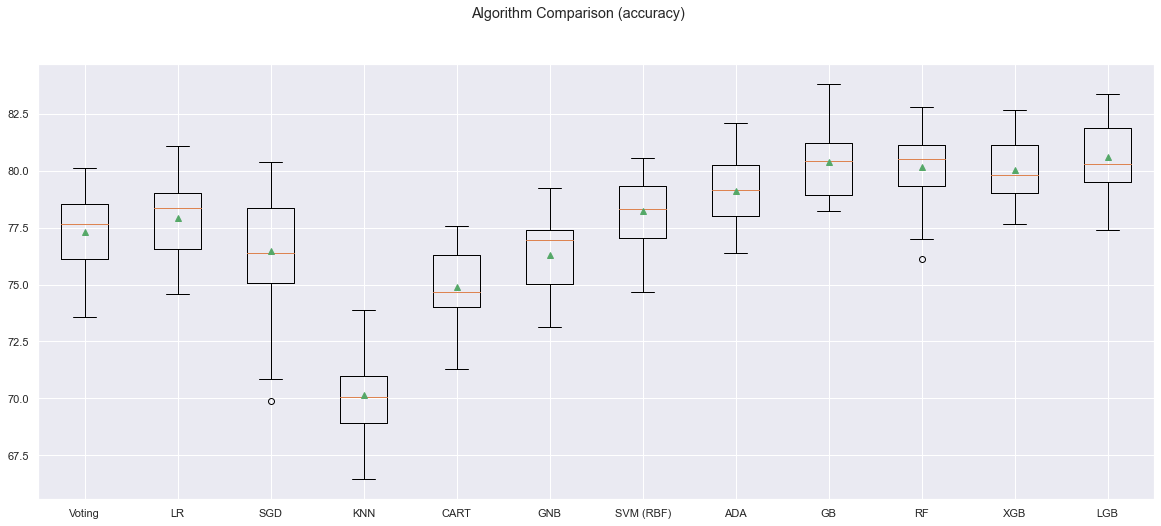

In [174]:
boxplot('accuracy', acc_score)

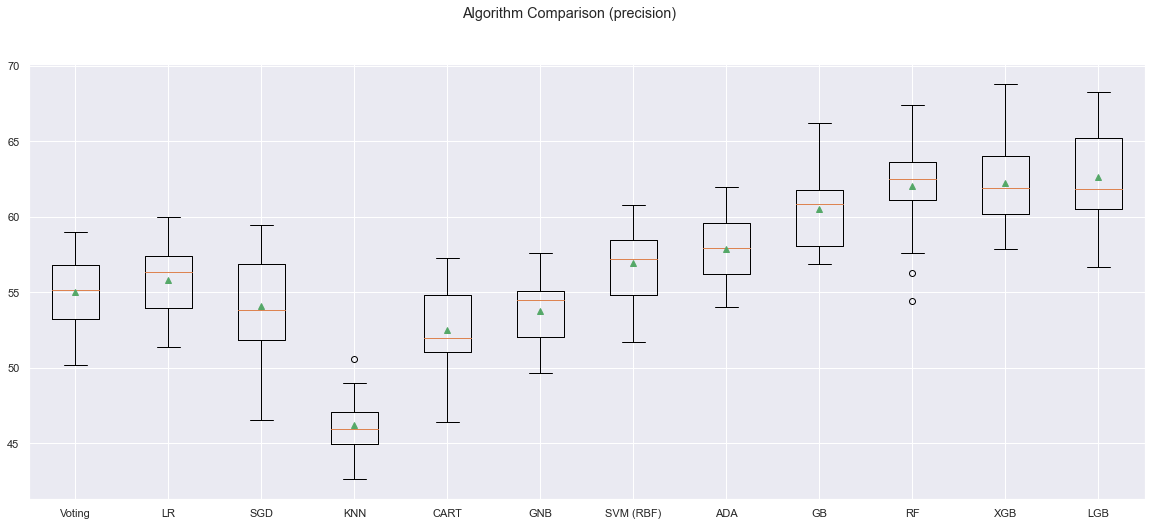

In [175]:
boxplot('precision', prec_score)

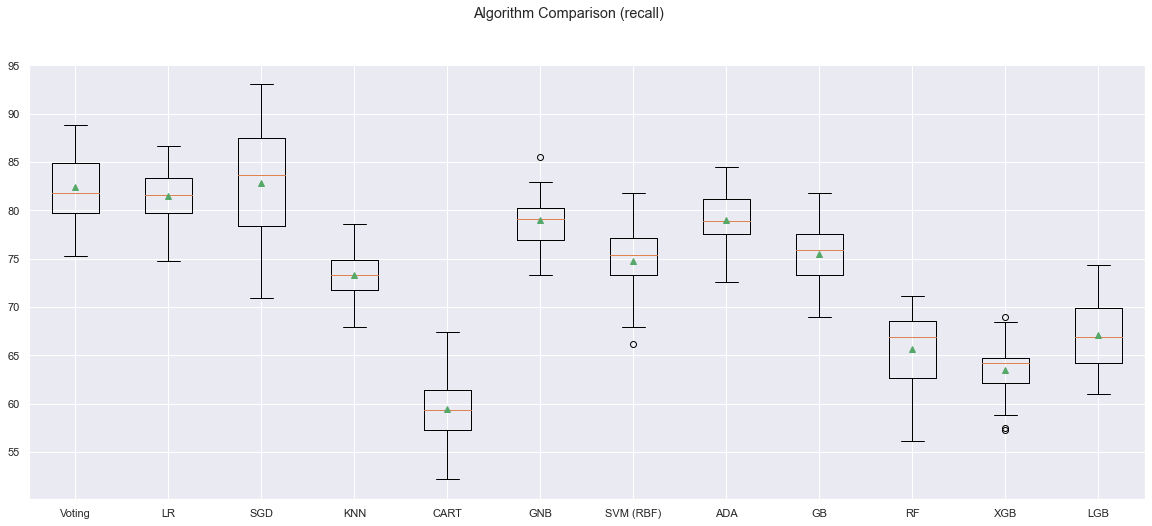

In [176]:
boxplot('recall', reca_score)

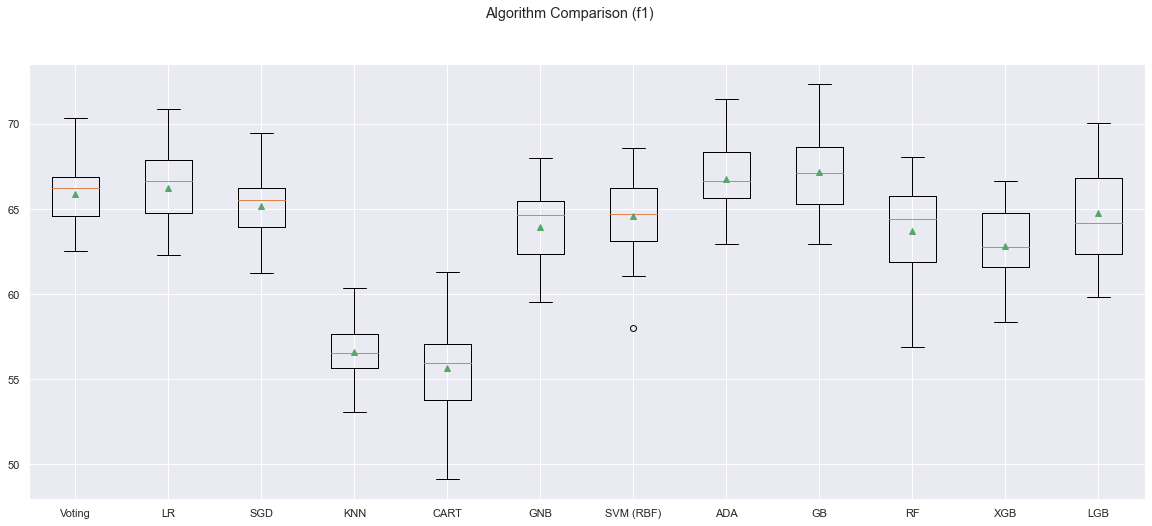

In [177]:
boxplot('f1', f1_scores)

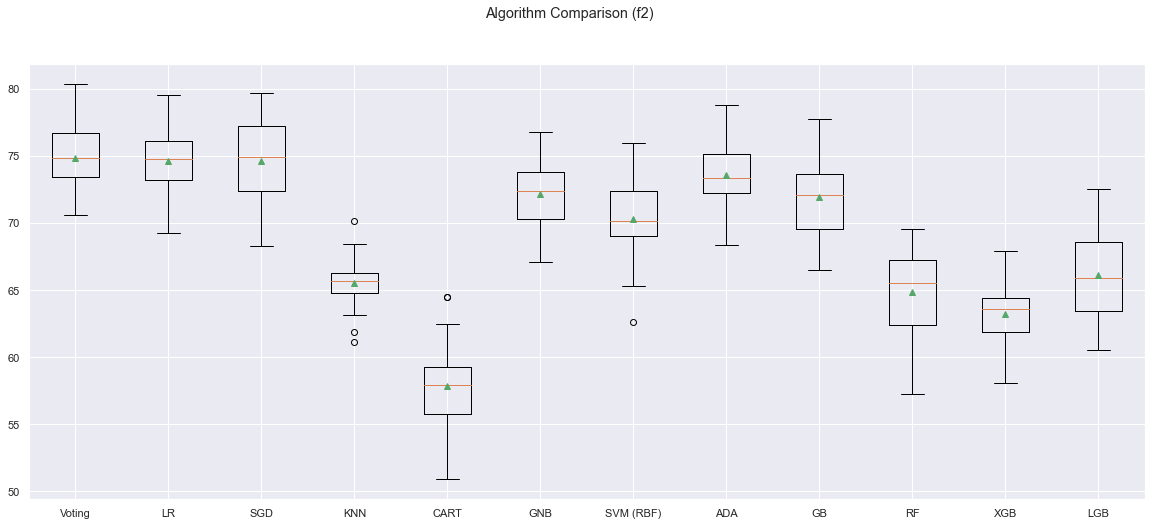

In [178]:
boxplot('f2', f2_score)

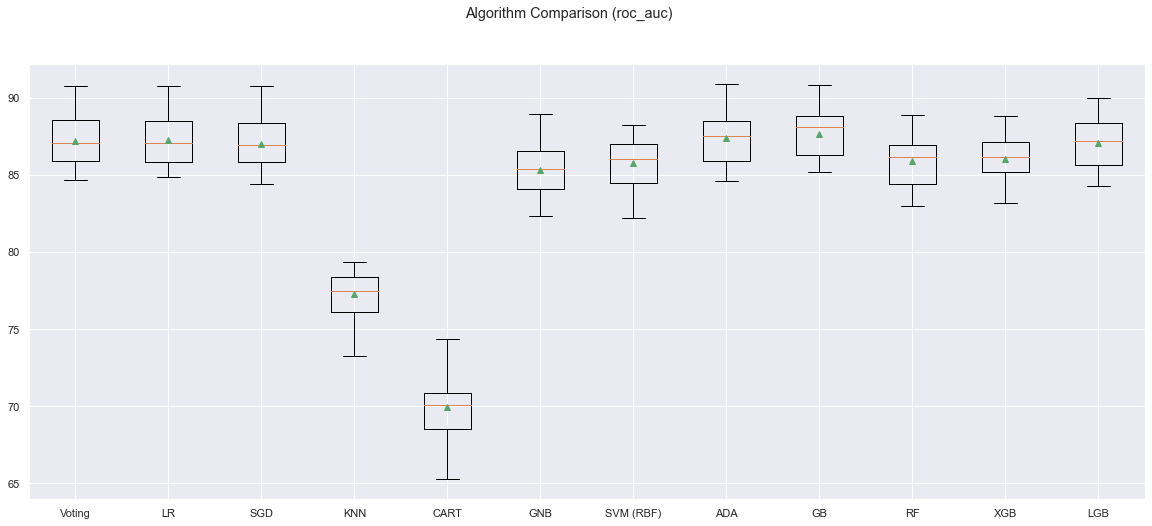

In [179]:
boxplot('roc_auc', roc_score)

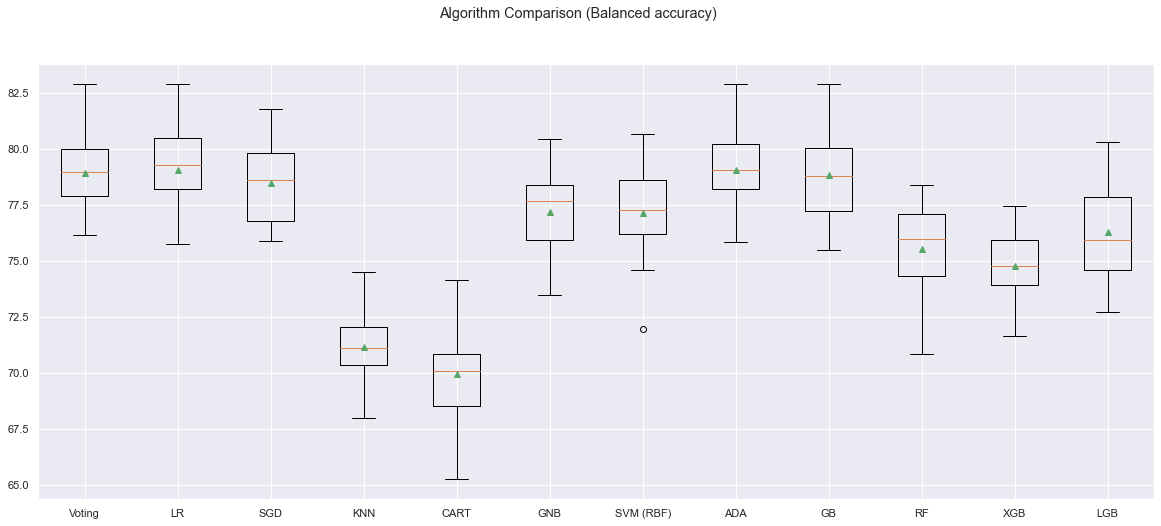

In [180]:
boxplot('Balanced accuracy', b_acc_score)

In [181]:
test_scores_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Balanced accuracy', 'Precision', 'Recall', 'F1', 'F2', 'ROC_AUC'])
train_scores_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Balanced accuracy', 'Precision', 'Recall', 'F1', 'F2', 'ROC_AUC'])
index = 0

for name, model in models:
    pipe = Pipeline(steps = [
        ('processor', processor),
        (name, model)
    ])

    _ = pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    predictions_train = pipe.predict(X_train)

    print(name, "trained!")
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    roc = roc_auc_score(y_test, predictions)
    f2 = fbeta_score(y_test, predictions, beta = 2)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    accuracy_train = accuracy_score(y_train, predictions_train)
    balanced_accuracy_train = balanced_accuracy_score(y_train, predictions_train)
    precision_train = precision_score(y_train, predictions_train)
    recall_train = recall_score(y_train, predictions_train)
    f1_train = f1_score(y_train, predictions_train)
    f2_train = fbeta_score(y_train, predictions_train, beta = 2)
    roc_train = roc_auc_score(y_train, predictions_train)

    model_results = pd.DataFrame([[name, accuracy, precision, recall, f1, f2, roc]],
        # columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
    )

    test_scores_df.loc[index] = [name, accuracy, balanced_accuracy, precision, recall, f1, f2, roc]
    train_scores_df.loc[index] = [name, accuracy_train, balanced_accuracy_train, precision_train, recall_train, f1_train, f2_train, roc_train]
    index += 1

    # scores_df.append(model_results, ignore_index = True)
    # scores_df = pd.concat([scores_df, model_results], ignore_index = True)

    # print(classification_report(y_test, predictions))

Voting trained!
LR trained!
SGD trained!
KNN trained!
CART trained!
GNB trained!
SVM (RBF) trained!
ADA trained!
GB trained!
RF trained!
XGB trained!
LGB trained!


In [182]:
test_scores_df

,Model,Accuracy,Balanced accuracy,Precision,Recall,F1,F2,ROC_AUC
0,Voting,0.754266,0.781435,0.523364,0.839400,0.644737,0.748949,0.781435
1,LR,0.765643,0.787131,0.538036,0.832976,0.653782,0.750675,0.787131
2,SGD,0.753697,0.784465,0.522368,0.850107,0.647107,0.755327,0.784465
3,KNN,0.688282,0.703707,0.447334,0.736617,0.556634,0.652256,0.703707
4,CART,0.749147,0.682278,0.527197,0.539615,0.533333,0.537084,0.682278
5,GNB,0.748578,0.765945,0.517241,0.802998,0.629195,0.723101,0.765945
6,SVM (RBF),0.757110,0.764238,0.529070,0.779443,0.630303,0.712050,0.764238
7,ADA,0.766780,0.784489,0.540084,0.822270,0.651952,0.744475,0.784489
8,GB,0.781570,0.796609,0.560058,0.828694,0.668394,0.756155,0.796609
9,RF,0.801479,0.758228,0.617063,0.665953,0.640577,0.655565,0.758228


In [183]:
train_scores_df

,Model,Accuracy,Balanced accuracy,Precision,Recall,F1,F2,ROC_AUC
0,Voting,0.797016,0.797037,0.770175,0.846441,0.806509,0.830003,0.797037
1,LR,0.799742,0.799758,0.779144,0.836395,0.806755,0.824282,0.799758
2,SGD,0.795438,0.795462,0.765480,0.851607,0.806250,0.832865,0.795462
3,KNN,0.848659,0.848697,0.795571,0.938289,0.861056,0.905791,0.848697
4,CART,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,GNB,0.778511,0.778524,0.762304,0.809127,0.785018,0.799308,0.778524
6,SVM (RBF),0.827571,0.827590,0.800897,0.871699,0.834799,0.856555,0.827590
7,ADA,0.804189,0.804201,0.787361,0.833238,0.809650,0.823640,0.804201
8,GB,0.827428,0.827444,0.805191,0.863662,0.833403,0.851299,0.827444
9,RF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Grid search (Logistic Regression with Gradient Descent)

In [186]:
SGD_clf = Pipeline(steps = [
    ('processor', processor),
    ('selector', SelectKBest(score_func=chi2, k=25)),
    # ('SMOTE', SMOTE(k_neighbors=3, random_state=state*2)),
    # ('under', RandomUnderSampler(sampling_strategy=0.99999, random_state=state)),
    ('SGD', SGDClassifier(random_state=state*2, loss='log'))    ## 7484, 1122 for good results
])

parameters = dict(
    selector__k = list(range(15, 28)),
    # selector__k = [25],
    selector__score_func = [chi2],
    SGD__max_iter = [5_000],
    SGD__class_weight=['balanced'],
    SGD__loss=['log'],
    SGD__alpha =  [1e-5, 5e-5, 1e-4, 5e-4]
)

kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=83492)
grid_search = GridSearchCV(
    estimator = SGD_clf, param_grid = parameters, cv = kfold, #scoring = make_scorer(fbeta_score, beta = 2)
    scoring = metrics, refit='recall'
)
grid_result = grid_search.fit(X, y)

# best result
best_score = grid_result.best_score_
best_parameters = grid_result.best_params_
print(f'Best score was {best_score} with {best_parameters}\n')

means = grid_result.cv_results_['mean_test_recall']
stds = grid_result.cv_results_['std_test_recall']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'{mean:.6f} ({stdev:.6f}) with {param}')

Best score was 0.8493833017077799 with {'SGD__alpha': 0.0001, 'SGD__class_weight': 'balanced', 'SGD__loss': 'log', 'SGD__max_iter': 5000, 'selector__k': 19, 'selector__score_func': <function chi2 at 0x0000018CD5669430>}

0.830394 (0.084287) with {'SGD__alpha': 1e-05, 'SGD__class_weight': 'balanced', 'SGD__loss': 'log', 'SGD__max_iter': 5000, 'selector__k': 15, 'selector__score_func': <function chi2 at 0x0000018CD5669430>}
0.823170 (0.071943) with {'SGD__alpha': 1e-05, 'SGD__class_weight': 'balanced', 'SGD__loss': 'log', 'SGD__max_iter': 5000, 'selector__k': 16, 'selector__score_func': <function chi2 at 0x0000018CD5669430>}
0.810337 (0.088859) with {'SGD__alpha': 1e-05, 'SGD__class_weight': 'balanced', 'SGD__loss': 'log', 'SGD__max_iter': 5000, 'selector__k': 17, 'selector__score_func': <function chi2 at 0x0000018CD5669430>}
0.790557 (0.140414) with {'SGD__alpha': 1e-05, 'SGD__class_weight': 'balanced', 'SGD__loss': 'log', 'SGD__max_iter': 5000, 'selector__k': 18, 'selector__score_func'

Best score was 0.8354766833419586 with {'SGD__class_weight': 'balanced', 'SGD__loss': 'log', 'selector__k': 25, 'selector__score_func': <function chi2 at 0x0000027AACCAB550>}

In [187]:
metrics.keys()

dict_keys(['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1', 'f2', 'roc_auc'])

In [188]:
grid_result.cv_results_['mean_test_f2'][4]

0.7158534533043303

In [189]:
best_model = grid_result.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1291
           1       0.55      0.80      0.65       467

    accuracy                           0.77      1758
   macro avg       0.73      0.78      0.74      1758
weighted avg       0.82      0.77      0.78      1758



In [190]:
best_model

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'Age', 'Number of Referrals',
                                                   'Avg Monthly GB Download']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=None,
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder()...
                                                   'Unlimited Data']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=None,
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['InternetService',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('selector',
                 SelectKBest(k=19,
                             score_func=<function chi2 at 0x0000018CD5669430>)),
                ('SGD',
                 SGDClassifier(class_weight='balanced', loss='log',
                               max_iter=5000, random_state=231398))])

In [191]:
best_model.named_steps['SGD'].coef_

array([[-2.10429726, -5.28461429, -0.0942469 , -0.39289119, -0.18652277,
         0.31373896,  1.34591679, -0.18652277, -0.23458068,  0.13800682,
         1.26972886, -1.31588478,  0.71885097,  0.01923712, -0.64623719,
         0.21471634, -0.01703442, -0.14841083,  0.0425798 ]])

In [193]:
# final_model = Pipeline(steps = [
#     ('processor', processor),
#     ('LR', LogisticRegression(class_weight = 'balanced', C=0.2, penalty='l1', solver='liblinear'))
#     # ('LR', SVC(kernel='linear', class_weight='balanced'))
# ])
final_model = best_model
_ = final_model.fit(X, y)
final_model

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'Age', 'Number of Referrals',
                                                   'Avg Monthly GB Download']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=None,
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder()...
                                                   'Unlimited Data']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=None,
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['InternetService',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('selector',
                 SelectKBest(k=19,
                             score_func=<function chi2 at 0x0000018CD5669430>)),
                ('SGD',
                 SGDClassifier(class_weight='balanced', loss='log',
                               max_iter=5000, random_state=231398))])

### Making a random prediction

In [205]:
data = {
    'Dependents' : ['Yes'],
    'tenure' : [None],
    'PhoneService' : ['Yes'],
    'MultipleLines' : ['Yes'],
    'InternetService' : ['Fiber optic'],
    'OnlineSecurity' : ['No'],
    'StreamingServices' : ['No'],
    'OnlineBackup' : ['No'],
    'DeviceProtection' : ['Yes'],
    'TechSupport' : ['Yes'],
    'Contract' : ['One year'],
    'PaperlessBilling' : ['No'],
    'PaymentMethod' : ['Cash'],
    'MonthlyCharges' : [10000],
    'Age' : [24],
    'Married' : ['No'],
    'Number of Referrals' : [None],
    # 'Offer' : ['Offer E'],
    'Avg Monthly GB Download' : [15],
    'Premium Tech Support' : ['No'],
    'Unlimited Data' : ['Yes'],
}
random_data_df = pd.DataFrame(data)

final_model.predict_proba(random_data_df) * 100

array([[11.0770576, 88.9229424]])

#### Save the model

In [196]:
filename = 'final_SGD_model.sav'
joblib.dump(final_model, filename)

['final_SGD_model.sav']

In [197]:
loaded_model = joblib.load(filename)
loaded_model

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'Age', 'Number of Referrals',
                                                   'Avg Monthly GB Download']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=None,
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder()...
                                                   'Unlimited Data']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=None,
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['InternetService',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('selector',
                 SelectKBest(k=19,
                             score_func=<function chi2 at 0x0000018CD5669430>)),
                ('SGD',
                 SGDClassifier(class_weight='balanced', loss='log',
                               max_iter=5000, random_state=231398))])

### Get names of selected_features

In [198]:
selected_cols = best_model.named_steps['selector'].get_support(indices=True)
selected_cols

array([ 0,  1,  3,  5,  8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25], dtype=int64)

In [199]:
selected_cols_df = df_temp.iloc[:, selected_cols]
selected_cols_df

,tenure,MonthlyCharges,Number of Referrals,Dependents,OnlineSecurity,TechSupport,PaperlessBilling,Married,Premium Tech Support,Unlimited Data,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Cash,PaymentMethod_Credit card (automatic),PaymentMethod_Mobile Banking
0,0.028169,0.361236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.042254,0.200797,0.3,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.014085,0.651719,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.605634,0.661684,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.464789,0.866467,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,0.746479,0.412556,0.9,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5270,0.492958,0.767314,0.4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5271,0.126761,0.010962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5272,0.492958,0.359243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [200]:
selected_cols_df.columns

Index(['tenure', 'MonthlyCharges', 'Number of Referrals', 'Dependents',
       'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 'Married',
       'Premium Tech Support', 'Unlimited Data', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Cash', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mobile Banking'],
      dtype='object')

In [201]:
df_cols = set(df_temp.columns)
df_selected_cols = set(selected_cols_df.columns)
df_cols - df_selected_cols

{'Age',
 'Avg Monthly GB Download',
 'DeviceProtection',
 'MultipleLines',
 'OnlineBackup',
 'PaymentMethod_eSewa',
 'PhoneService',
 'StreamingServices'}

The features above are the ones omitted during grid search.

In [202]:
onehot_columns = list(final_model.named_steps['processor'].named_transformers_['onehot'].named_steps['encoder'].get_feature_names(input_features=onehot_columns))
numeric_features_list = list(num_features)
numeric_features_list.extend(ordinal_columns)
numeric_features_list.extend(onehot_columns)

In [203]:
# eli5.explain_weights(final_model.named_steps['LR'], top=60, feature_names=numeric_features_list, feature_filter=lambda x: x != '<BIAS>')
eli5.explain_weights(final_model.named_steps['SGD'], top=60, feature_names=list(selected_cols_df.columns), feature_filter=lambda x: x != '<BIAS>')

Weight?,Feature
+1.277,Married
+1.201,MonthlyCharges
+0.975,Contract_Month-to-month
+0.782,InternetService_Fiber optic
+0.377,PaymentMethod_Cash
+0.185,InternetService_DSL
+0.184,PaperlessBilling
+0.116,PaymentMethod_Mobile Banking
+0.001,TechSupport
+0.001,Premium Tech Support
